# **Preliminary exploration**

Preliminary exploration on how different features can influence students performances. Histograms, box plots and kllr trends are shown. A Huber regressor model was used.



**Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Exploring Data**

# Portuguese

In [2]:
df = pd.read_excel('data/student-por.xlsx')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:


schools = ('GP', 'MS')
sex = ('F', 'M')
address = ('U', 'R')
fam_size = ('LT3', 'GT3')
fam_status = ('T', 'A')
work = ('teacher', 'health', 'services', 'at_home', 'other')  #5
reason = ('home', 'reputation', 'course', 'other') #4
guardian = ('mother', 'father', 'other')
schoolsup = ('yes', 'no')

df = df.replace(
      ('GP', 'MS', 'F', 'M', 'U', 'R', 'LE3', 'GT3', 'T', 'A',
      'teacher', 'health', 'services', 'at_home', 'other', 
      'home', 'reputation', 'course', 'other',
      'mother', 'father', 'other',
      'yes', 'no'), 
      (0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 
        1, 2, 3, 4, 5, 
        1, 2, 3, 4, 
        1, 2, 3, 
        1, 0))

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,4,1,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,1,0,1,1,4,3,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,0,0,1,1,4,3,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,1,0,4,2,2,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,1,0,3,3,3,3,...,4,3,2,1,2,5,0,11,13,13


In [4]:
y = df.loc[:, ['G1', 'G2', 'G3']]
x = df.iloc[:,0:30]


### Box plots

C:\Users\lawso\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'Gabriel Pereira'), Text(0, 0, 'Mousinho da Silveira')]

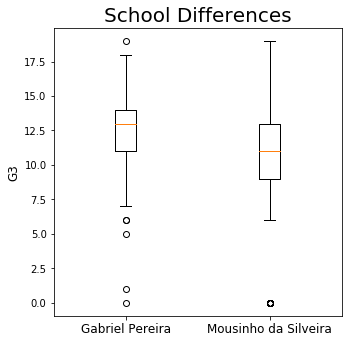

In [5]:
fig = plt.figure(figsize =(4, 4))
ax = fig.add_axes([0, 0, 1, 1])

condition = df["school"] == 0

data_1 = df[condition]["G3"]
data_2 = df[~condition]["G3"]
data = [data_1, data_2]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("School Differences", size = 20)
ax.set_xticks([1,2])
ax.set_ylabel('G3', size=12)
ax.set_xticklabels(['Gabriel Pereira', 'Mousinho da Silveira'], size=12)

C:\Users\lawso\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'At least one teacher'), Text(0, 0, 'No teachers')]

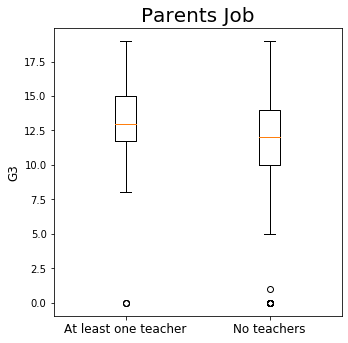

In [6]:
fig = plt.figure(figsize =(4, 4))
ax = fig.add_axes([0, 0, 1, 1])

condition = (
    (df["Mjob"] == 1) | (df["Fjob"] == 1)
)

data_1 = df[condition]["G3"]
data_2 = df[~condition]["G3"]
data = [data_1, data_2]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("Parents Job", size = 20)
ax.set_xticks([1,2])
ax.set_ylabel('G3', size=12)
ax.set_xticklabels(['At least one teacher', 'No teachers'], size=12)

C:\Users\lawso\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'Secondary or higher'), Text(0, 0, 'Lower than secondary')]

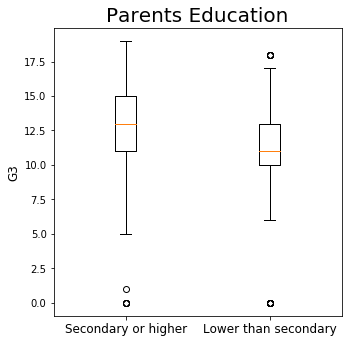

In [7]:
fig = plt.figure(figsize =(4, 4))
ax = fig.add_axes([0, 0, 1, 1])

condition = (
    (df["Medu"] >= 3) | (df["Fedu"] >= 3)
)

data_1 = df[condition]["G3"]
data_2 = df[~condition]["G3"]
data = [data_1, data_2]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("Parents Education", size = 20)
ax.set_xticks([1,2])
ax.set_ylabel('G3', size=12)
ax.set_xticklabels(['Secondary or higher', 'Lower than secondary'], size=12)

C:\Users\lawso\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, 'Higher levels'), Text(0, 0, 'Lower levels')]

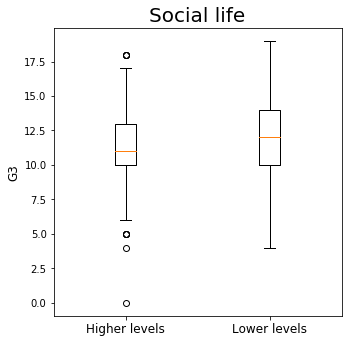

In [8]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_axes([0, 0, 1, 1])

condition = (
    (df["absences"] >= 10) |
    (df["goout"] >= 3) |
    (df["Dalc"] >= 3) |
    (df["Walc"] >= 3)
)

data_1 = df[condition]["G1"]
data_2 = df[~condition]["G1"]
data = [data_1, data_2]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("Social life", size = 20)
ax.set_xticks([1,2])
ax.set_ylabel('G3', size=12)
ax.set_xticklabels(['Higher levels', 'Lower levels'], size=12)

C:\Users\lawso\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, '2 or more'), Text(0, 0, 'Less than 2')]

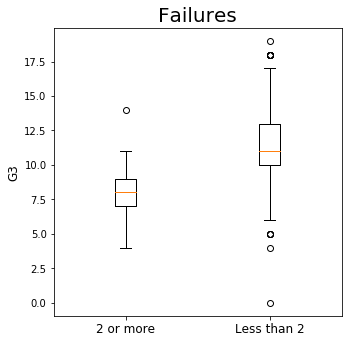

In [9]:
fig = plt.figure(figsize =(4, 4))
ax = fig.add_axes([0, 0, 1, 1])

condition = (
    (df["failures"] > 1)
)

data_1 = df[condition]["G1"]
data_2 = df[~condition]["G1"]
data = [data_1, data_2]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("Failures", size = 20)
ax.set_xticks([1,2])
ax.set_ylabel('G3', size=12)
ax.set_xticklabels(['2 or more', 'Less than 2'], size=12)

C:\Users\lawso\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[Text(0, 0, '15-18'), Text(0, 0, '19-20'), Text(0, 0, '>20')]

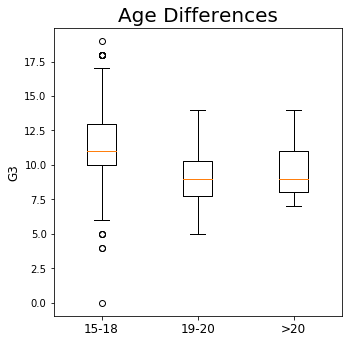

In [10]:
fig = plt.figure(figsize =(4, 4))
ax = fig.add_axes([0, 0, 1, 1])

condition1 = (
    (df["age"] <= 18) 
)

condition2 = (
    (df["age"] > 18) &
    (df["age"] < 20)
)

condition3 = (
    (df["age"] >= 20)
)

data_1 = df[condition1]["G1"]
data_2 = df[condition2]["G1"]
data_3 = df[condition3]["G1"]
data = [data_1, data_2, data_3]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("Age Differences", size = 20)
ax.set_xticks([1,2,3])
ax.set_ylabel('G3', size=12)
ax.set_xticklabels(['15-18', '19-20', '>20'], size=12)

### Mother's Education 

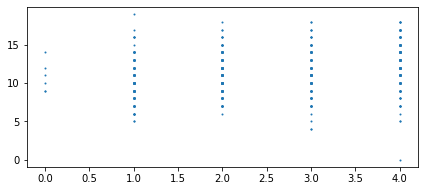

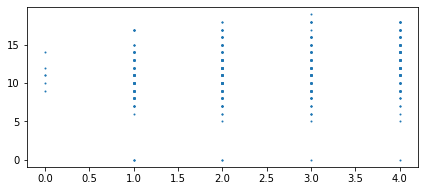

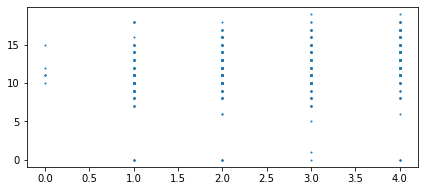

0
10.833333333333334 1.7716909687891083
1
10.398601398601398 2.5886785789612565
2
11.204301075268818 2.3580525032913107
3
11.323741007194245 2.77246436708133
4
12.502857142857144 2.866305308659386


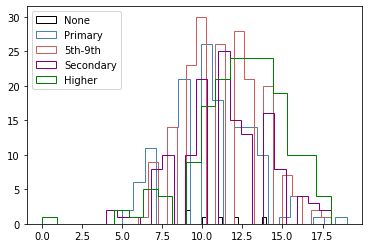

0
11.166666666666666 1.5723301886761005
1
10.524475524475525 2.7680296893799863
2
11.28494623655914 2.762943974406945
3
11.56115107913669 2.958015832922903
4
12.748571428571429 2.7660566494117758


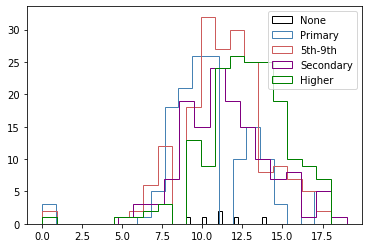

0
11.666666666666666 1.5986105077709065
1
10.797202797202797 3.152442588463524
2
11.661290322580646 3.0529919137446497
3
11.920863309352518 3.111974432126292
4
13.06857142857143 3.227716701019595


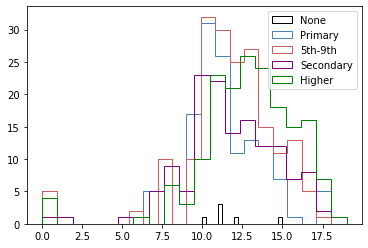

In [11]:
import numpy as np

variable = 'Medu'

plt_num = 1
for i in range(len(y.iloc[0])):
    plt.figure(figsize=(7,10))
    plt.subplot(len(y.iloc[0]), 1, plt_num)
    plt.scatter(x[variable], y.iloc[:,i], s=1)

    plt_num += 1

plt.show()

df_medu_1 = df[df['Medu'] == 0]
df_medu_2 = df[df['Medu'] == 1]
df_medu_3 = df[df['Medu'] == 2]
df_medu_4 = df[df['Medu'] == 3]
df_medu_5 = df[df['Medu'] == 4]

df_medu = [df_medu_1, df_medu_2, df_medu_3, df_medu_4, df_medu_5]

g1_medu_1 = df_medu_1.loc[:,'G1']
g1_medu_2 = df_medu_2.loc[:,'G1']
g1_medu_3 = df_medu_3.loc[:,'G1']
g1_medu_4 = df_medu_4.loc[:,'G1']
g1_medu_5 = df_medu_5.loc[:,'G1']

g2_medu_1 = df_medu_1.loc[:,'G2']
g2_medu_2 = df_medu_2.loc[:,'G2']
g2_medu_3 = df_medu_3.loc[:,'G2']
g2_medu_4 = df_medu_4.loc[:,'G2']
g2_medu_5 = df_medu_5.loc[:,'G2']

g3_medu_1 = df_medu_1.loc[:,'G3']
g3_medu_2 = df_medu_2.loc[:,'G3']
g3_medu_3 = df_medu_3.loc[:,'G3']
g3_medu_4 = df_medu_4.loc[:,'G3']
g3_medu_5 = df_medu_5.loc[:,'G3']

g1 = [g1_medu_1, g1_medu_2, g1_medu_3, g1_medu_4, g1_medu_5]
g2 = [g2_medu_1, g2_medu_2, g2_medu_3, g2_medu_4, g2_medu_5]
g3 = [g3_medu_1, g3_medu_2, g3_medu_3, g3_medu_4, g3_medu_5]

g_list = [g1, g2, g3]

label=['None', 'Primary', '5th-9th', 'Secondary', 'Higher']
color=['k', 'steelblue', 'indianred', 'purple', 'g']

for g in g_list:
  for i in range(len(g)):
    print(i)
    plt.hist(g[i], 20, histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(np.mean(g[i]), np.std(g[i]))
  plt.legend()
  plt.show()
  


Father Education

0
11.428571428571429 2.2587697572631282
1
10.522988505747126 2.6298551662154663
2
11.368421052631579 2.7691322971598904
3
11.732824427480915 2.353572653722392
4
12.296875 2.8841142894093155


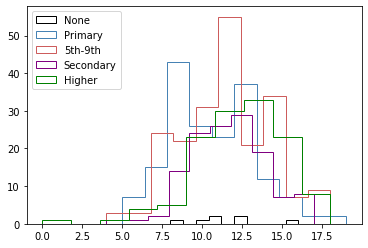

0
11.571428571428571 2.3819045715047236
1
10.695402298850574 2.881626617831049
2
11.411483253588516 3.2271370577390233
3
11.992366412213741 2.138331314905849
4
12.5859375 2.720085429925639


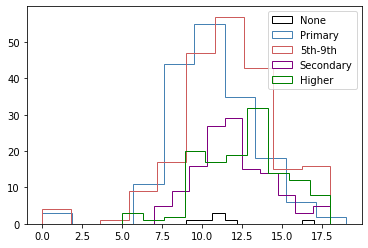

0
12.142857142857142 2.587252896610691
1
10.936781609195402 3.41422362701888
2
11.78468899521531 3.4400616195554132
3
12.381679389312977 2.481867110710011
4
12.921875 2.9036867056166717


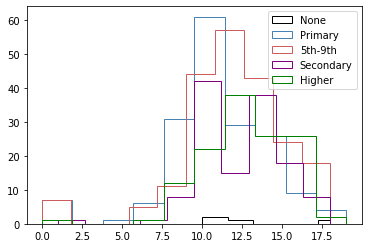

In [12]:
df_fedu_1 = df[df['Fedu'] == 0]
df_fedu_2 = df[df['Fedu'] == 1]
df_fedu_3 = df[df['Fedu'] == 2]
df_fedu_4 = df[df['Fedu'] == 3]
df_fedu_5 = df[df['Fedu'] == 4]

df_fedu = [df_fedu_1, df_fedu_2, df_fedu_3, df_fedu_4, df_fedu_5]

g1_fedu_1 = df_fedu_1.loc[:,'G1']
g1_fedu_2 = df_fedu_2.loc[:,'G1']
g1_fedu_3 = df_fedu_3.loc[:,'G1']
g1_fedu_4 = df_fedu_4.loc[:,'G1']
g1_fedu_5 = df_fedu_5.loc[:,'G1']

g2_fedu_1 = df_fedu_1.loc[:,'G2']
g2_fedu_2 = df_fedu_2.loc[:,'G2']
g2_fedu_3 = df_fedu_3.loc[:,'G2']
g2_fedu_4 = df_fedu_4.loc[:,'G2']
g2_fedu_5 = df_fedu_5.loc[:,'G2']

g3_fedu_1 = df_fedu_1.loc[:,'G3']
g3_fedu_2 = df_fedu_2.loc[:,'G3']
g3_fedu_3 = df_fedu_3.loc[:,'G3']
g3_fedu_4 = df_fedu_4.loc[:,'G3']
g3_fedu_5 = df_fedu_5.loc[:,'G3']

g1 = [g1_fedu_1, g1_fedu_2, g1_fedu_3, g1_fedu_4, g1_fedu_5]
g2 = [g2_fedu_1, g2_fedu_2, g2_fedu_3, g2_fedu_4, g2_fedu_5]
g3 = [g3_fedu_1, g3_fedu_2, g3_fedu_3, g3_fedu_4, g3_fedu_5]

g_list = [g1, g2, g3]

label=['None', 'Primary', '5th-9th', 'Secondary', 'Higher']
color=['k', 'steelblue', 'indianred', 'purple', 'g']

for g in g_list:
  for i in range(len(g)):
    print(i)
    plt.hist(g[i], 10, histtype='step', color=color[i], label=label[i],)
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,60)
    print(np.mean(g[i]), np.std(g[i]))
  plt.legend()
  plt.show()

### Parents Education

12.494736842105263 2.905072457509365
10.770547945205479 2.477036115791235


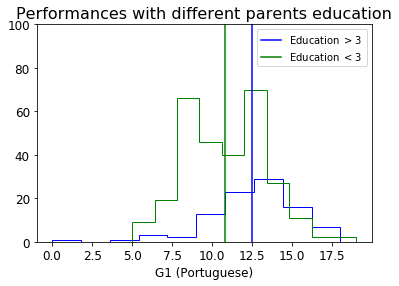

12.821052631578947 2.643677452132564
10.842465753424657 2.788647131526261


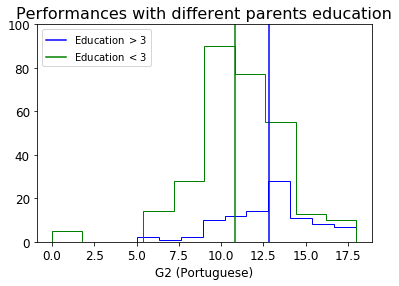

13.115789473684211 2.872237924079545
11.181506849315069 3.1662713784092977


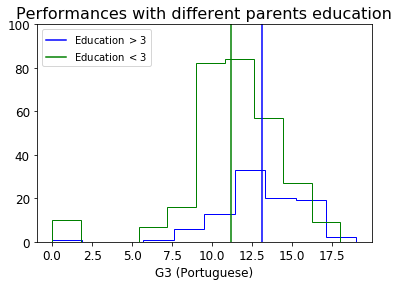

In [13]:
df_m_gt3 = df[df['Medu'] > 3 ]
df_m_lt3 = df[df['Medu'] < 3 ]

df_mf_gt3 = df_m_gt3[df_m_gt3['Fedu']>3]
df_mf_lt3 = df_m_lt3[df_m_lt3['Fedu']<3]

g1_gt3 = df_mf_gt3.loc[:,'G1']
g2_gt3 = df_mf_gt3.loc[:,'G2']
g3_gt3 = df_mf_gt3.loc[:,'G3']

g1_lt3 = df_mf_lt3.loc[:,'G1']
g2_lt3 = df_mf_lt3.loc[:,'G2']
g3_lt3 = df_mf_lt3.loc[:,'G3']

G_list = (('G1', [g1_gt3, g1_lt3]), 
          ('G2', [g2_gt3, g2_lt3]), 
          ('G3', [g3_gt3, g3_lt3]))

label = ['Education $>3$ ', 'Education $<3$']
color = ['b', 'g']

for exam, G in G_list:

  s = exam

  for i in range(len(G)):

    plt.hist(G[i], histtype='step', color=color[i])
    plt.plot([np.mean(G[i]), np.mean(G[i])], [0, 100], color=color[i], label=label[i])
    plt.ylim(0,100)
    plt.xlabel('%s (Portuguese)'%s, size=12)
    plt.title('Performances with different parents education', size=16)
    plt.yticks(size=12)
    plt.xticks(size=12)

    print(np.mean(G[i]), np.std(G[i]))
  plt.legend()
  plt.show()



12.494736842105263 2.905072457509365
10.770547945205479 2.477036115791235


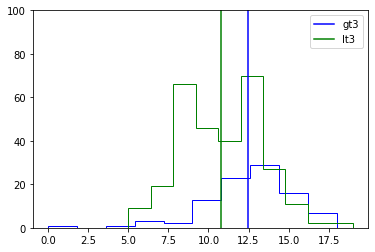

12.821052631578947 2.643677452132564
10.842465753424657 2.788647131526261


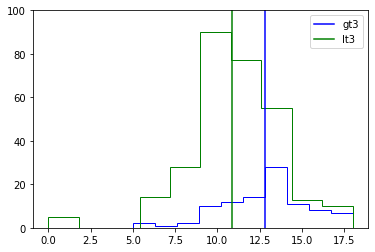

13.115789473684211 2.872237924079545
11.181506849315069 3.1662713784092977


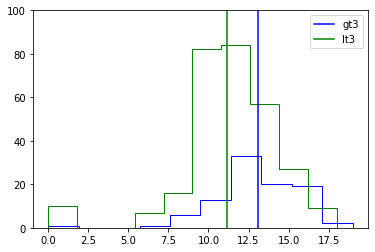

In [14]:
df_m_gt3 = df[df['Medu'] > 3 ]
df_m_lt3 = df[df['Medu'] < 3 ]

df_mf_gt3 = df_m_gt3[df_m_gt3['Fedu']>3]
df_mf_lt3 = df_m_lt3[df_m_lt3['Fedu']<3]

g1_gt3 = df_mf_gt3.loc[:,'G1']
g2_gt3 = df_mf_gt3.loc[:,'G2']
g3_gt3 = df_mf_gt3.loc[:,'G3']

g1_lt3 = df_mf_lt3.loc[:,'G1']
g2_lt3 = df_mf_lt3.loc[:,'G2']
g3_lt3 = df_mf_lt3.loc[:,'G3']

G_list = [[g1_gt3, g1_lt3,], [g2_gt3, g2_lt3], [g3_gt3, g3_lt3]]

label = ['gt3', 'lt3']
color = ['b', 'g']

for G in G_list:
  for i in range(len(G)):
    plt.hist(G[i], histtype='step', color=color[i])
    plt.plot([np.mean(G[i]), np.mean(G[i])], [0, 100], color=color[i], label=label[i])
    plt.ylim(0,100)

    print(np.mean(G[i]), np.std(G[i]))
  plt.legend()
  plt.show()

### Failures



0 : 11.88888888888889 2.580656015149761
1 : 8.9 1.898495645053134
2 : 8.1875 2.3242942477233814
3 : 8.357142857142858 1.3420210162897095
4 : nan nan


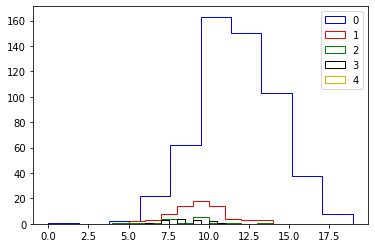

0 : 12.102003642987249 2.628929635983466
1 : 8.7 2.74824619400394
2 : 8.9375 2.2211694554896075
3 : 8.071428571428571 2.462991378509524
4 : nan nan


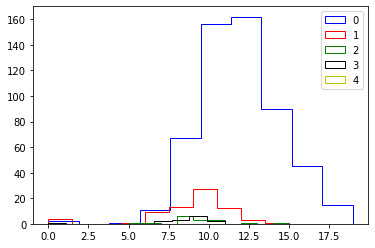

0 : 12.510018214936247 2.826235049213399
1 : 8.642857142857142 3.418586651509298
2 : 8.8125 3.106822130409142
3 : 8.071428571428571 2.6849923041732144
4 : nan nan


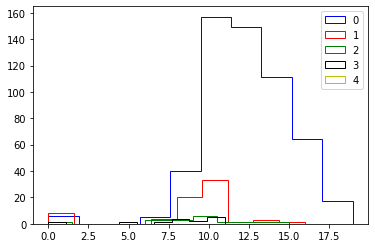

In [15]:
df_ssup_1 = df[df['failures'] == 0]  
df_ssup_2 = df[df['failures'] == 1]
df_ssup_3 = df[df['failures'] == 2]  
df_ssup_4 = df[df['failures'] == 3]
df_ssup_5 = df[df['failures'] == 4]


g1_ssup_1 = df_ssup_1.loc[:,'G1']  
g1_ssup_2 = df_ssup_2.loc[:,'G1']
g1_ssup_3 = df_ssup_3.loc[:,'G1']  
g1_ssup_4 = df_ssup_4.loc[:,'G1']
g1_ssup_5 = df_ssup_5.loc[:,'G1']  


g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']
g2_ssup_3 = df_ssup_3.loc[:,'G2']
g2_ssup_4 = df_ssup_4.loc[:,'G2']
g2_ssup_5 = df_ssup_5.loc[:,'G2']


g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']
g3_ssup_3 = df_ssup_3.loc[:,'G3']
g3_ssup_4 = df_ssup_4.loc[:,'G3']
g3_ssup_5 = df_ssup_5.loc[:,'G3']


g1 = [g1_ssup_1, g1_ssup_2, g1_ssup_3, g1_ssup_4, g1_ssup_5]
g2 = [g2_ssup_1, g2_ssup_2, g2_ssup_3, g2_ssup_4, g2_ssup_5]
g3 = [g3_ssup_1, g3_ssup_2, g3_ssup_3, g3_ssup_4, g3_ssup_5]

g_list = [g1, g2, g3]

label=['0', '1', '2', '3', '4']
color=['b', 'r', 'g', 'k', 'y']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.legend()
  plt.show()

### School support

1: yes
0: no

No : 11.46643717728055 2.77082026943332
Yes : 10.823529411764707 2.4189276699943636


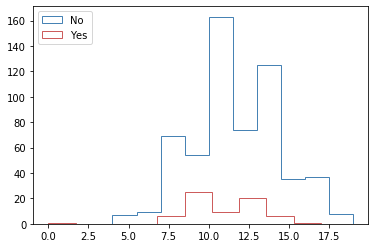

No : 11.626506024096386 2.9979774614326233
Yes : 11.088235294117647 1.9609068589156808


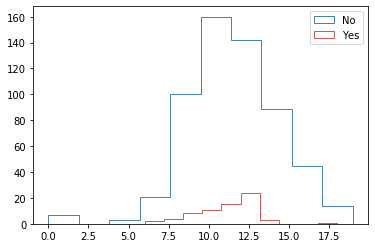

No : 11.97934595524957 3.3131855057163864
Yes : 11.279411764705882 2.2870838627290673


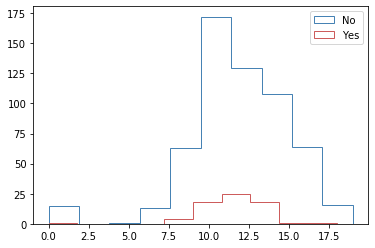

In [16]:
df_ssup_1 = df[df['schoolsup'] == 0]  # no support
df_ssup_2 = df[df['schoolsup'] == 1]  # support

g1_ssup_1 = df_ssup_1.loc[:,'G1']  # no support
g1_ssup_2 = df_ssup_2.loc[:,'G1']  # support


g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']


g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']

g1 = [g1_ssup_1, g1_ssup_2]
g2 = [g2_ssup_1, g2_ssup_2]
g3 = [g3_ssup_1, g3_ssup_2]

g_list = [g1, g2, g3]

label=['No', 'Yes']
color=['steelblue', 'indianred']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.legend()
  plt.show()

### Family support

1: yes
0: no

No : 11.266932270916335 2.8642010336479213
Yes : 11.482412060301508 2.6606082750041145


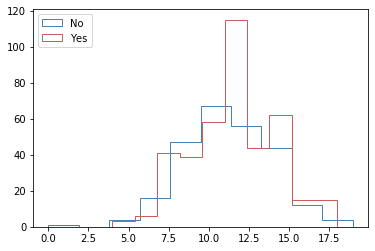

No : 11.430278884462151 3.0931938396089524
Yes : 11.658291457286433 2.7870517365828245


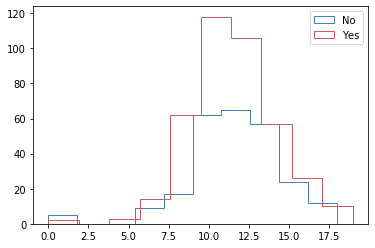

No : 11.665338645418327 3.5949768221025757
Yes : 12.057788944723619 2.9636282828100677


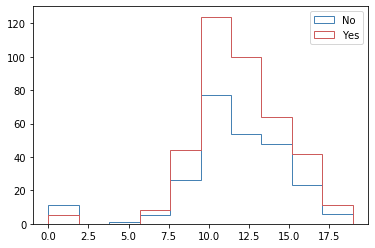

In [17]:
df_ssup_1 = df[df['famsup'] == 0]  # no support
df_ssup_2 = df[df['famsup'] == 1]  # support

g1_ssup_1 = df_ssup_1.loc[:,'G1']  # no support
g1_ssup_2 = df_ssup_2.loc[:,'G1']  # support

g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']

g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']

g1 = [g1_ssup_1, g1_ssup_2]
g2 = [g2_ssup_1, g2_ssup_2]
g3 = [g3_ssup_1, g3_ssup_2]

g_list = [g1, g2, g3]

label=['No', 'Yes']
color=['steelblue', 'indianred']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.legend()
  plt.show()

### Family and School support

No : 11.387931034482758 2.830777740468759
Yes : 11.224489795918368 2.092409080485926


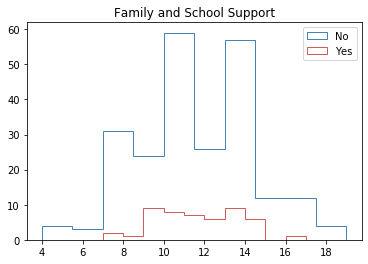

No : 11.5 3.1731633297454733
Yes : 11.285714285714286 2.040408122440814


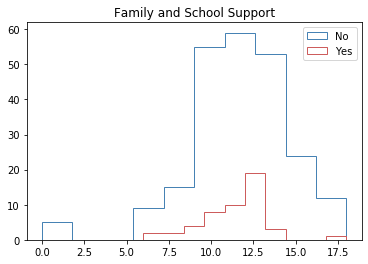

No : 11.737068965517242 3.7063326555861726
Yes : 11.46938775510204 2.507963161011924


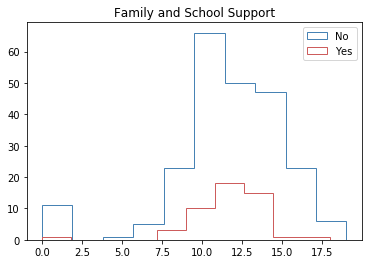

In [18]:
df_onlyschool_1 = df[df['schoolsup'] == 0]  # no support
df_onlyschool_2 = df[df['schoolsup'] == 1]  # support

df_ssup_1 = df_onlyschool_1[df_onlyschool_1['famsup'] == 0] # no support
df_ssup_2 = df_onlyschool_2[df_onlyschool_2['famsup'] == 1] # support


g1_ssup_1 = df_ssup_1.loc[:,'G1']  # no support
g1_ssup_2 = df_ssup_2.loc[:,'G1']  # support


g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']


g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']

g1 = [g1_ssup_1, g1_ssup_2]
g2 = [g2_ssup_1, g2_ssup_2]
g3 = [g3_ssup_1, g3_ssup_2]

g_list = [g1, g2, g3]

label=['No', 'Yes']
color=['steelblue', 'indianred']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.title('Family and School Support')
  plt.legend()
  plt.show()

### Parents job

**Teachers or not**

Yes : 14.1875 2.6976552318634046
No : 11.22262118491921 2.6624575832361086


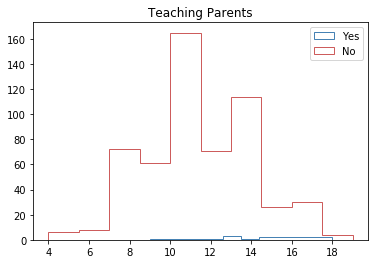

Yes : 14.0 3.082207001484488
No : 11.38061041292639 2.874174799209095


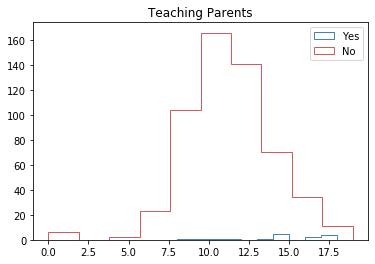

Yes : 14.375 3.07967124868873
No : 11.70915619389587 3.170466073437897


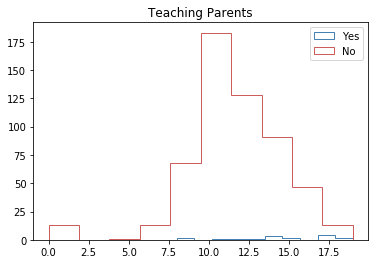

In [19]:
df_fteach = df[df['Fjob'] == 1] #father teaches
df_fnotteach = df[df['Fjob'] != 1]  #father does not teach

df_fmteach = df_fteach[df_fteach['Mjob'] == 1] #father and mother teach
df_fmnotteach = df_fnotteach[df_fnotteach['Mjob'] != 1]  #parents do not teach


g1_teach = df_fmteach.loc[:,'G1']  
g1_notteach = df_fmnotteach.loc[:,'G1']  


g2_teach = df_fmteach.loc[:,'G2']
g2_notteach = df_fmnotteach.loc[:,'G2']


g3_teach = df_fmteach.loc[:,'G3']
g3_notteach = df_fmnotteach.loc[:,'G3']

g1 = [g1_teach, g1_notteach]
g2 = [g2_teach, g2_notteach]
g3 = [g3_teach, g3_notteach]

g_list = [g1, g2, g3]

label=['Yes', 'No']
color=['steelblue', 'indianred']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.title('Teaching Parents')
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


Teaching Parents
G1 grades: 14.1875 +/- 2.6976552318634046

Non Teaching Parents
G1 grades: 11.22262118491921 +/- 2.6624575832361086



No handles with labels found to put in legend.
No handles with labels found to put in legend.


Teaching Parents
G2 grades: 14.1875 +/- 2.6976552318634046

Non Teaching Parents
G2 grades: 11.22262118491921 +/- 2.6624575832361086

Teaching Parents
G3 grades: 14.1875 +/- 2.6976552318634046

Non Teaching Parents
G3 grades: 11.22262118491921 +/- 2.6624575832361086



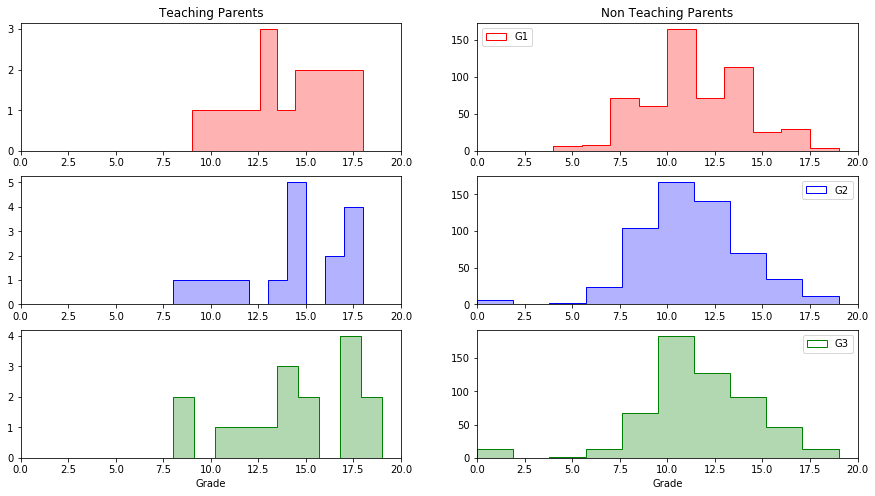

In [20]:
fig, axs = plt.subplots(3,2, figsize=(15,8))

titles = ['Teaching Parents', 'Non Teaching Parents']
exams = ['G1', 'G2', 'G3']
colors = ['r', 'b', 'g']

for j in range(3):
  g = g_list[j]

  for i in range(2):
    axs[j,i].hist(g[i], histtype='step', label=exams[j], color=colors[j])

    axs[j,i].hist(g[i], histtype='stepfilled', color=colors[j], alpha=0.3)
    axs[j,i].set_xlim(0,20)
    axs[j,1].legend()
    
    if j == 0:
      axs[j,i].set_title(titles[i])
    if j == 2:
      axs[j,i].set_xlabel('Grade')
    print(titles[i])
    print(exams[j], 'grades:', np.mean(g1[i]), '+/-', np.std(g1[i]))
    print()
  
plt.show()



### Higher education plan

No : 8.623188405797102 1.850197398597949
Yes : 11.729310344827587 2.6433070079294225


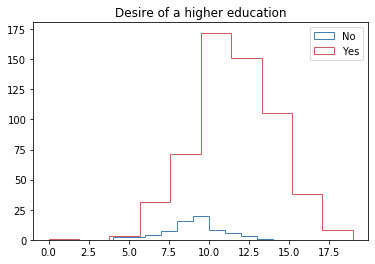

No : 8.768115942028986 2.438489242063392
Yes : 11.903448275862068 2.7806576694931016


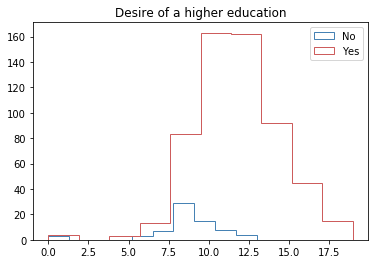

No : 8.797101449275363 2.951686867965442
Yes : 12.275862068965518 3.0557639343303906


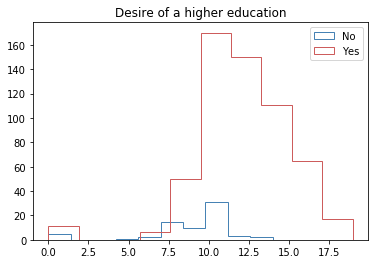

In [21]:
df_ssup_1 = df[df['higher'] == 0]  # does not want higher education
df_ssup_2 = df[df['higher'] == 1]  # wants higher education


g1_ssup_1 = df_ssup_1.loc[:,'G1']
g1_ssup_2 = df_ssup_2.loc[:,'G1'] 


g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']


g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']

g1 = [g1_ssup_1, g1_ssup_2]
g2 = [g2_ssup_1, g2_ssup_2]
g3 = [g3_ssup_1, g3_ssup_2]

g_list = [g1, g2, g3]

label=['No', 'Yes']
color=['steelblue', 'indianred']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.title('Desire of a higher education')
  plt.legend()
  plt.show()

### Workday Alcohol Consumption

Very low : 11.698447893569845 2.771804871791107
Low : 11.090909090909092 2.6253689233079367
Middle : 10.44186046511628 2.2235768961491202
High : 9.941176470588236 2.127428390591191
Very high : 9.529411764705882 2.5232483046502607


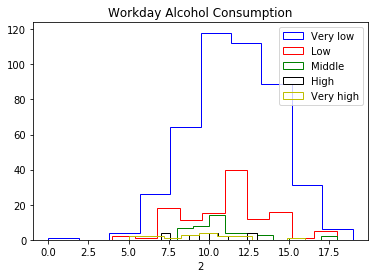

Very low : 11.89578713968958 2.8441023100894065
Low : 11.15702479338843 3.082899420042119
Middle : 10.744186046511627 2.4024505246781316
High : 9.470588235294118 3.145821636969633
Very high : 10.058823529411764 2.0995962703029116


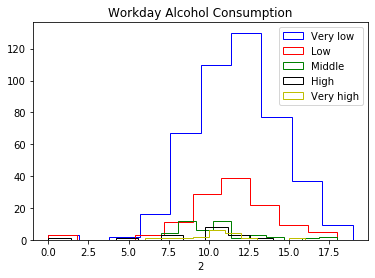

Very low : 12.299334811529933 3.099456286072762
Low : 11.363636363636363 3.315378641601905
Middle : 11.13953488372093 2.2264937013770103
High : 8.941176470588236 4.976067290013318
Very high : 10.235294117647058 2.8600578308572278


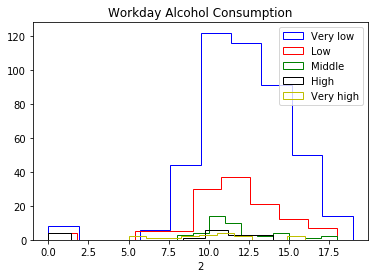

In [22]:
df_ssup_1 = df[df['Dalc'] == 1]  
df_ssup_2 = df[df['Dalc'] == 2]
df_ssup_3 = df[df['Dalc'] == 3]  
df_ssup_4 = df[df['Dalc'] == 4]
df_ssup_5 = df[df['Dalc'] == 5]


g1_ssup_1 = df_ssup_1.loc[:,'G1']  
g1_ssup_2 = df_ssup_2.loc[:,'G1']
g1_ssup_3 = df_ssup_3.loc[:,'G1']  
g1_ssup_4 = df_ssup_4.loc[:,'G1']
g1_ssup_5 = df_ssup_5.loc[:,'G1']  


g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']
g2_ssup_3 = df_ssup_3.loc[:,'G2']
g2_ssup_4 = df_ssup_4.loc[:,'G2']
g2_ssup_5 = df_ssup_5.loc[:,'G2']


g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']
g3_ssup_3 = df_ssup_3.loc[:,'G3']
g3_ssup_4 = df_ssup_4.loc[:,'G3']
g3_ssup_5 = df_ssup_5.loc[:,'G3']


g1 = [g1_ssup_1, g1_ssup_2, g1_ssup_3, g1_ssup_4, g1_ssup_5]
g2 = [g2_ssup_1, g2_ssup_2, g2_ssup_3, g2_ssup_4, g2_ssup_5]
g3 = [g3_ssup_1, g3_ssup_2, g3_ssup_3, g3_ssup_4, g3_ssup_5]

g_list = [g1, g2, g3]

label=['Very low', 'Low', 'Middle', 'High', 'Very high']
color=['b', 'r', 'g', 'k', 'y']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.title('Workday Alcohol Consumption')
  plt.xlabel(j)
  plt.legend()
  plt.show()

### Courses performances comparison

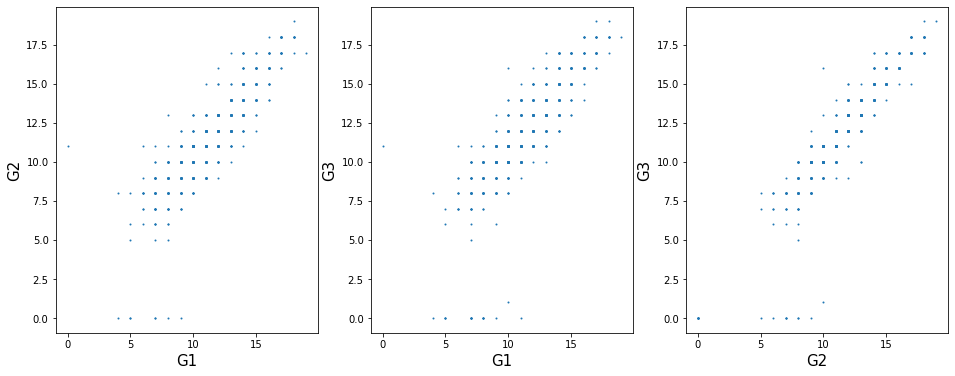

In [23]:
fig, ax = plt.subplots(1,3, figsize=(16,6))

ax[0].scatter(y.iloc[:,0], y.iloc[:,1], s=1)
ax[0].set_xlabel('G1', size=15)
ax[0].set_ylabel('G2', size=15)
ax[1].scatter(y.iloc[:,0], y.iloc[:,2], s=1)
ax[1].set_xlabel('G1', size=15)
ax[1].set_ylabel('G3', size=15)
ax[2].scatter(y.iloc[:,1], y.iloc[:,2], s=1)
ax[2].set_xlabel('G2', size=15)
ax[2].set_ylabel('G3', size=15)
plt.show()

### KLLR

In [24]:
!pip install --upgrade git+https://github.com/afarahi/kllr.git
import kllr as kl

  Cloning https://github.com/afarahi/kllr.git to c:\users\lawso\appdata\local\temp\pip-req-build-ob0b3k6f


  Running command git clone -q https://github.com/afarahi/kllr.git 'C:\Users\lawso\AppData\Local\Temp\pip-req-build-ob0b3k6f'
You should consider upgrading via the 'c:\users\lawso\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.
C:\Users\lawso\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\lawso\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence t

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 212.18it/s]
No handles with labels found to put in legend.


[Text(0, 0, 'None'),
 Text(0, 0, 'Primary'),
 Text(0, 0, '$5^{th}$ - $9^{th}$'),
 Text(0, 0, 'Secondary'),
 Text(0, 0, 'Higher')]

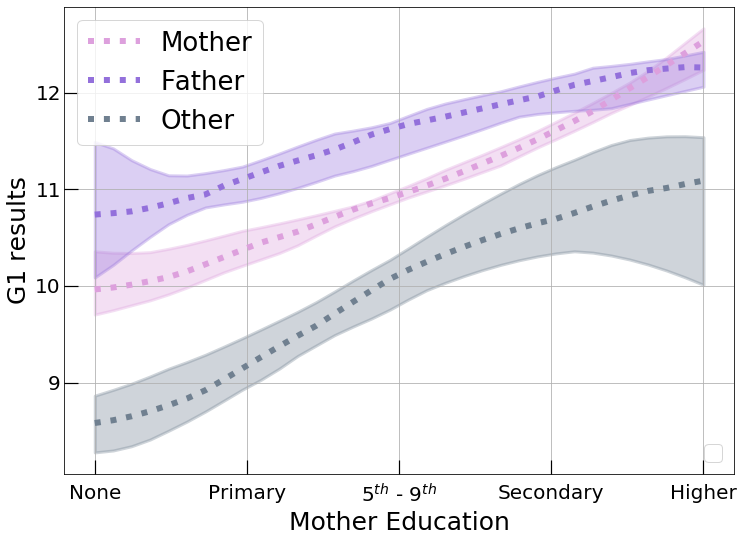

In [25]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'Medu', 'G1', 'guardian', split_bins=[0.5, 1.5, 2.5, 5.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 4], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=1,
                                  show_data=False, xlog=False, ylog=False, color=['plum', 'mediumpurple', 'slategrey'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)
ax[0].lines[1].set_label(None)
ax[0].lines[2].set_label(None)

for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1], ax[0].lines[2]], ["Mother", "Father", "Other"], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G1 results', size=25)
ax[0].set_xlabel('Mother Education', size=25)
ax[0].tick_params(labelbottom=True)
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].set_xticklabels(['None', 'Primary', '$5^{th}$ - '+'$9^{th}$', 'Secondary', 'Higher'])

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 224.59it/s]
No handles with labels found to put in legend.


[Text(0, 0, 'None'),
 Text(0, 0, 'Primary'),
 Text(0, 0, '$5^{th}$ - $9^{th}$'),
 Text(0, 0, 'Secondary'),
 Text(0, 0, 'Higher')]

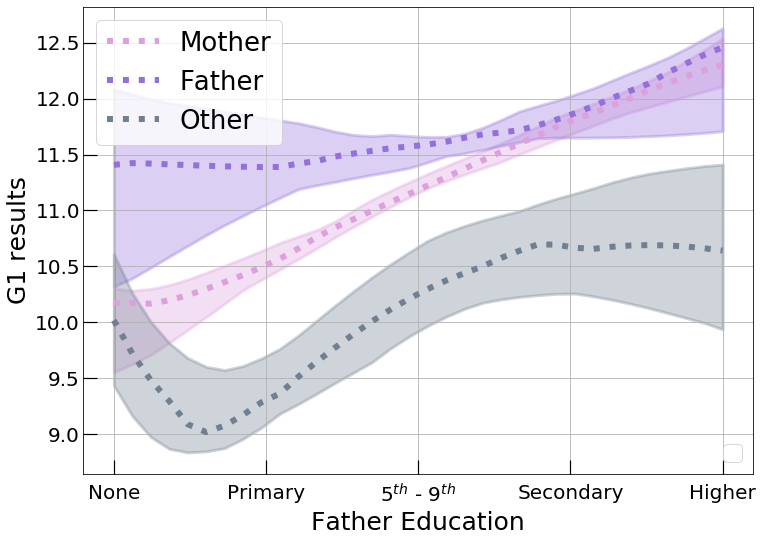

In [26]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'Fedu', 'G1', 'guardian', split_bins=[0.5, 1.5, 2.5, 5.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 4], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=1,
                                  show_data=False, xlog=False, ylog=False, color=['plum', 'mediumpurple', 'slategrey'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)
ax[0].lines[1].set_label(None)
ax[0].lines[2].set_label(None)

for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1], ax[0].lines[2]], ["Mother", "Father", "Other"], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G1 results', size=25)
ax[0].set_xlabel('Father Education', size=25)
ax[0].tick_params(labelbottom=True)
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].set_xticklabels(['None', 'Primary', '$5^{th}$ - '+'$9^{th}$', 'Secondary', 'Higher'])

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 205.30it/s]
No handles with labels found to put in legend.


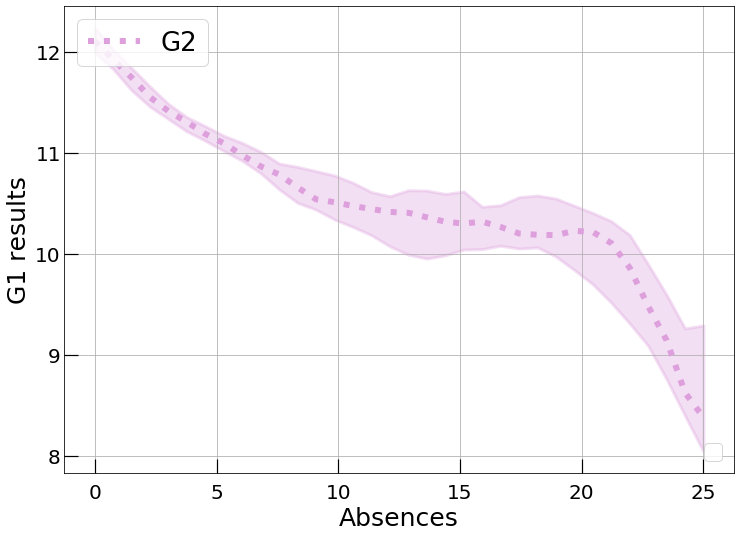

In [27]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'absences', 'G1', 'G2', split_bins=[0.5, 20.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 25], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=2,
                                  show_data=False, xlog=False, ylog=False, color=['plum'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)


for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0]], ['G2'], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G1 results', size=25)
ax[0].set_xlabel('Absences', size=25)
ax[0].tick_params(labelbottom=True)
#ax[0].set_xticks([0, 1, 2, 3, 4])
#ax[0].set_xticklabels(['None', 'Primary', '$5^{th}$ - '+'$9^{th}$', 'Secondary', 'Higher'])

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 197.47it/s]
No handles with labels found to put in legend.


Text(0.5, 1.0, "Mother's Job")

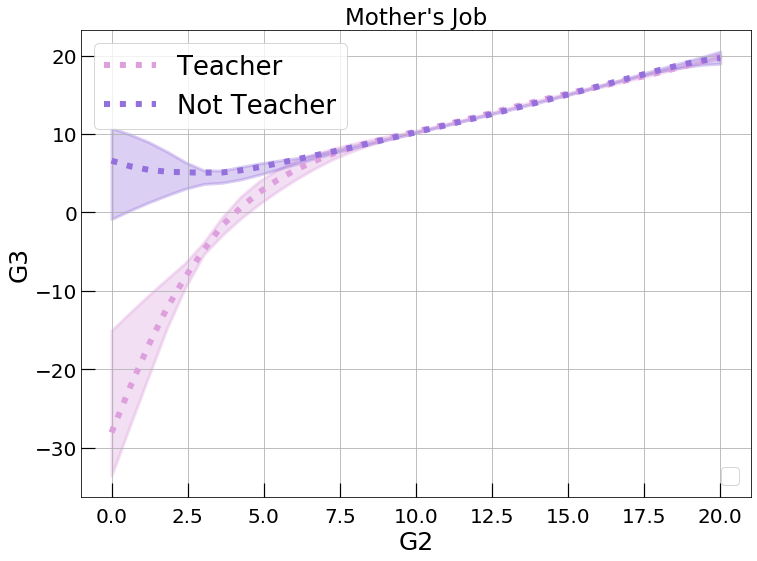

In [28]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'G1', 'G2',  'Mjob', split_bins=[0,1.5,5.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 20], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=2,
                                  show_data=False, xlog=False, ylog=False, color=['plum', 'mediumpurple'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)
ax[0].lines[1].set_label(None)


for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1]], ['Teacher', 'Not Teacher'], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G3', size=25)
ax[0].set_xlabel('G2', size=25)
ax[0].tick_params(labelbottom=True)
ax[0].set_title("Mother's Job", size=23)

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 209.66it/s]
No handles with labels found to put in legend.


Text(0.5, 1.0, "Father's Job")

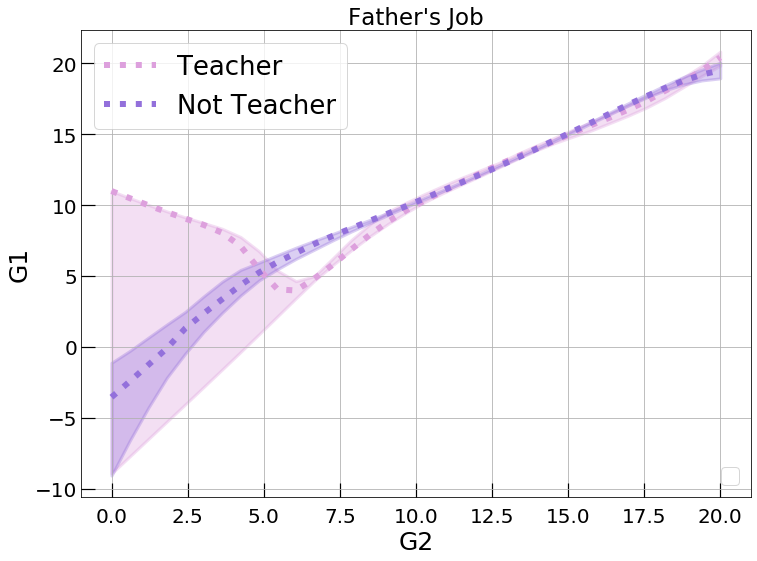

In [29]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'G1', 'G2',  'Fjob', split_bins=[0,1.5,5.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 20], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=2,
                                  show_data=False, xlog=False, ylog=False, color=['plum', 'mediumpurple'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)
ax[0].lines[1].set_label(None)


for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1]], ['Teacher', 'Not Teacher'], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G1', size=25)
ax[0].set_xlabel('G2', size=25)
ax[0].tick_params(labelbottom=True)
ax[0].set_title("Father's Job", size=23)

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 234.20it/s]
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Family Relations with or without School support')

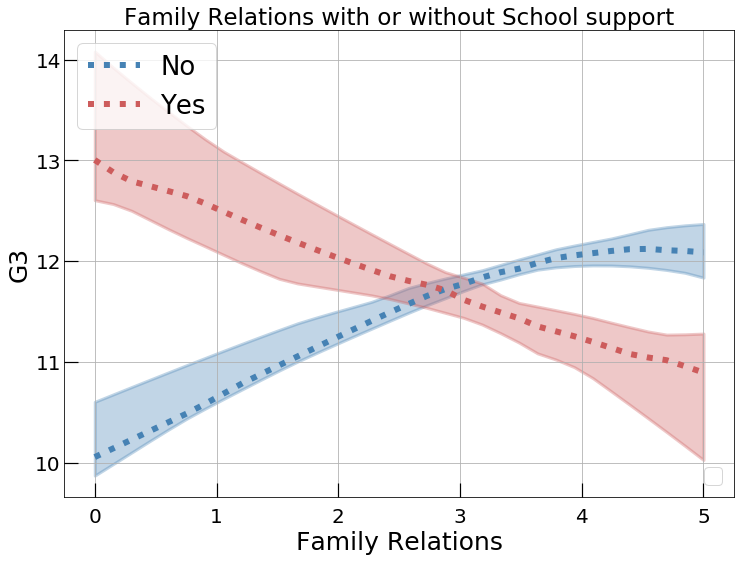

In [30]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'famrel', 'G3',  'schoolsup', split_bins=[-0.1, 0.5, 1.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 5], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=2,
                                  show_data=False, xlog=False, ylog=False, color=['steelblue', 'indianred'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)
ax[0].lines[1].set_label(None)


for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1]], ['No', 'Yes'], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G3', size=25)
ax[0].set_xlabel('Family Relations', size=25)
ax[0].tick_params(labelbottom=True)
ax[0].set_title("Family Relations with or without School support", size=23)

# Math

In [31]:

df = pd.read_excel('data/student-mat.xlsx')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [32]:


schools = ('GP', 'MS')
sex = ('F', 'M')
address = ('U', 'R')
fam_size = ('LT3', 'GT3')
fam_status = ('T', 'A')
work = ('teacher', 'health', 'services', 'at_home', 'other')  #5
reason = ('home', 'reputation', 'course', 'other') #4
guardian = ('mother', 'father', 'other')
schoolsup = ('yes', 'no')

df = df.replace(
      ('GP', 'MS', 'F', 'M', 'U', 'R', 'LE3', 'GT3', 'T', 'A',
      'teacher', 'health', 'services', 'at_home', 'other', 
      'home', 'reputation', 'course', 'other',
      'mother', 'father', 'other',
      'yes', 'no'), 
      (0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 
        1, 2, 3, 4, 5, 
        1, 2, 3, 4, 
        1, 2, 3, 
        1, 0))

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,4,1,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,0,1,1,4,3,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,0,1,1,4,3,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,0,4,2,2,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,0,3,3,3,3,...,4,3,2,1,2,5,4,6,10,10


In [33]:
y = df.loc[:, ['G1', 'G2', 'G3']]
x = df.iloc[:,0:30]

y.iloc[:,0]

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64

### Mother's Education 

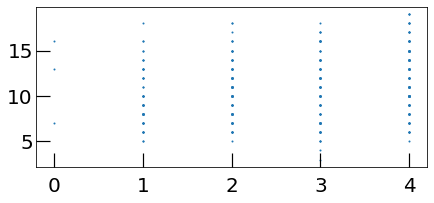

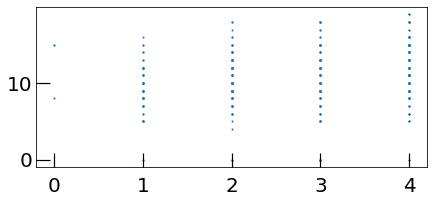

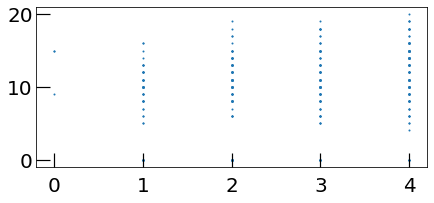

0
12.0 3.7416573867739413
1
9.745762711864407 3.0174252147725538
2
10.563106796116505 2.925183266726103
3
10.606060606060606 3.501278790391316
4
11.908396946564885 3.3049820862638613


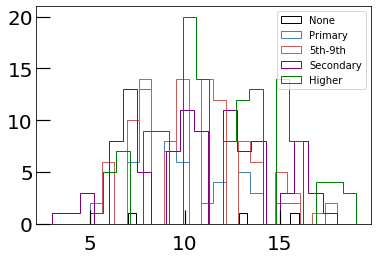

0
12.666666666666666 3.2998316455372216
1
9.169491525423728 3.18445664882304
2
10.359223300970873 3.3264295238770867
3
10.444444444444445 4.236022105373934
4
11.84732824427481 3.5885170605394108


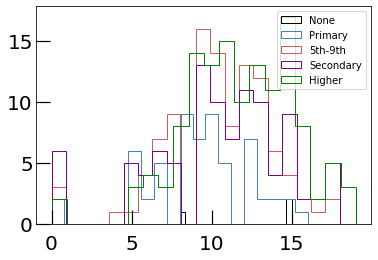

0
13.0 2.8284271247461903
1
8.677966101694915 4.327447589852326
2
9.728155339805825 4.613602039805208
3
10.303030303030303 4.600075856762648
4
11.763358778625955 4.251325901964353


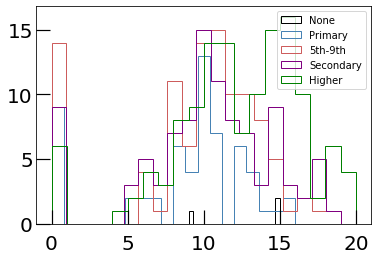

In [34]:
import numpy as np

variable = 'Medu'

plt_num = 1
for i in range(len(y.iloc[0])):
    plt.figure(figsize=(7,10))
    plt.subplot(len(y.iloc[0]), 1, plt_num)
    plt.scatter(x[variable], y.iloc[:,i], s=1)

    plt_num += 1

plt.show()

df_medu_1 = df[df['Medu'] == 0]
df_medu_2 = df[df['Medu'] == 1]
df_medu_3 = df[df['Medu'] == 2]
df_medu_4 = df[df['Medu'] == 3]
df_medu_5 = df[df['Medu'] == 4]

df_medu = [df_medu_1, df_medu_2, df_medu_3, df_medu_4, df_medu_5]

g1_medu_1 = df_medu_1.loc[:,'G1']
g1_medu_2 = df_medu_2.loc[:,'G1']
g1_medu_3 = df_medu_3.loc[:,'G1']
g1_medu_4 = df_medu_4.loc[:,'G1']
g1_medu_5 = df_medu_5.loc[:,'G1']

g2_medu_1 = df_medu_1.loc[:,'G2']
g2_medu_2 = df_medu_2.loc[:,'G2']
g2_medu_3 = df_medu_3.loc[:,'G2']
g2_medu_4 = df_medu_4.loc[:,'G2']
g2_medu_5 = df_medu_5.loc[:,'G2']

g3_medu_1 = df_medu_1.loc[:,'G3']
g3_medu_2 = df_medu_2.loc[:,'G3']
g3_medu_3 = df_medu_3.loc[:,'G3']
g3_medu_4 = df_medu_4.loc[:,'G3']
g3_medu_5 = df_medu_5.loc[:,'G3']

g1 = [g1_medu_1, g1_medu_2, g1_medu_3, g1_medu_4, g1_medu_5]
g2 = [g2_medu_1, g2_medu_2, g2_medu_3, g2_medu_4, g2_medu_5]
g3 = [g3_medu_1, g3_medu_2, g3_medu_3, g3_medu_4, g3_medu_5]

g_list = [g1, g2, g3]

label=['None', 'Primary', '5th-9th', 'Secondary', 'Higher']
color=['k', 'steelblue', 'indianred', 'purple', 'g']

for g in g_list:
  for i in range(len(g)):
    print(i)
    plt.hist(g[i], 20, histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(np.mean(g[i]), np.std(g[i]))
  plt.legend()
  plt.show()
  


### Father Education

0
12.0 1.0
1
9.731707317073171 3.253698760127277
2
11.02608695652174 3.2045100542970273
3
10.74 3.2081770524707642
4
11.927083333333334 3.2921775711103782


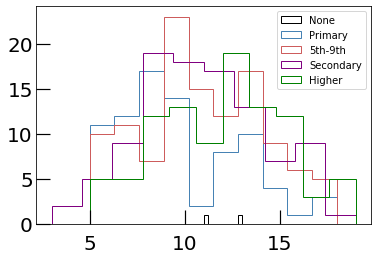

0
13.0 2.0
1
9.390243902439025 3.7015359289347067
2
10.878260869565217 3.4266165999789684
3
10.75 3.601041516006168
4
11.5625 4.043545525484617


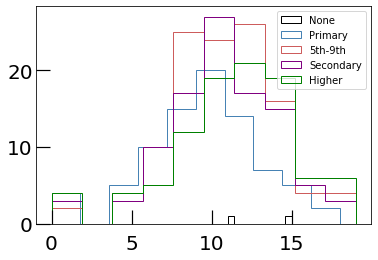

0
13.0 3.0
1
9.158536585365853 4.53568375514765
2
10.26086956521739 4.712770728510831
3
10.66 4.128486405451761
4
11.364583333333334 4.641568950946316


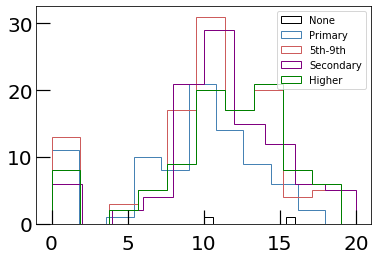

In [35]:
df_fedu_1 = df[df['Fedu'] == 0]
df_fedu_2 = df[df['Fedu'] == 1]
df_fedu_3 = df[df['Fedu'] == 2]
df_fedu_4 = df[df['Fedu'] == 3]
df_fedu_5 = df[df['Fedu'] == 4]

df_fedu = [df_fedu_1, df_fedu_2, df_fedu_3, df_fedu_4, df_fedu_5]

g1_fedu_1 = df_fedu_1.loc[:,'G1']
g1_fedu_2 = df_fedu_2.loc[:,'G1']
g1_fedu_3 = df_fedu_3.loc[:,'G1']
g1_fedu_4 = df_fedu_4.loc[:,'G1']
g1_fedu_5 = df_fedu_5.loc[:,'G1']

g2_fedu_1 = df_fedu_1.loc[:,'G2']
g2_fedu_2 = df_fedu_2.loc[:,'G2']
g2_fedu_3 = df_fedu_3.loc[:,'G2']
g2_fedu_4 = df_fedu_4.loc[:,'G2']
g2_fedu_5 = df_fedu_5.loc[:,'G2']

g3_fedu_1 = df_fedu_1.loc[:,'G3']
g3_fedu_2 = df_fedu_2.loc[:,'G3']
g3_fedu_3 = df_fedu_3.loc[:,'G3']
g3_fedu_4 = df_fedu_4.loc[:,'G3']
g3_fedu_5 = df_fedu_5.loc[:,'G3']

g1 = [g1_fedu_1, g1_fedu_2, g1_fedu_3, g1_fedu_4, g1_fedu_5]
g2 = [g2_fedu_1, g2_fedu_2, g2_fedu_3, g2_fedu_4, g2_fedu_5]
g3 = [g3_fedu_1, g3_fedu_2, g3_fedu_3, g3_fedu_4, g3_fedu_5]

g_list = [g1, g2, g3]

label=['None', 'Primary', '5th-9th', 'Secondary', 'Higher']
color=['k', 'steelblue', 'indianred', 'purple', 'g']

for g in g_list:
  for i in range(len(g)):
    print(i)
    plt.hist(g[i], 10, histtype='step', color=color[i], label=label[i],)
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,60)
    print(np.mean(g[i]), np.std(g[i]))
  plt.legend()
  plt.show()

### Parents Education

11.885714285714286 3.370217700229285
10.11111111111111 3.0904073006564388


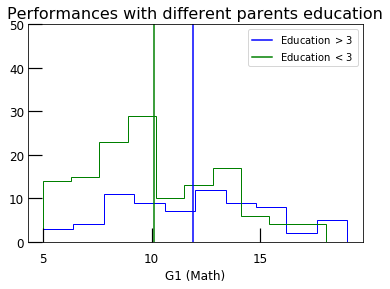

11.814285714285715 3.5788779452418837
9.792592592592593 3.4104334389380213


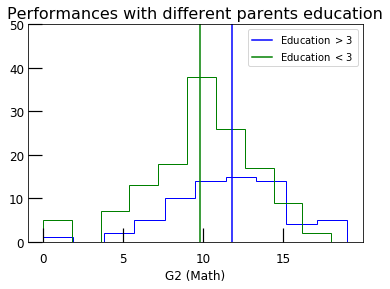

11.657142857142857 4.322319860860813
9.155555555555555 4.639391190370127


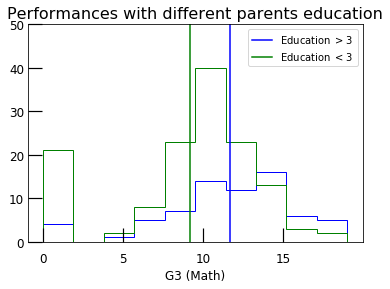

In [36]:
df_m_gt3 = df[df['Medu'] > 3 ]
df_m_lt3 = df[df['Medu'] < 3 ]

df_mf_gt3 = df_m_gt3[df_m_gt3['Fedu']>3]
df_mf_lt3 = df_m_lt3[df_m_lt3['Fedu']<3]

g1_gt3 = df_mf_gt3.loc[:,'G1']
g2_gt3 = df_mf_gt3.loc[:,'G2']
g3_gt3 = df_mf_gt3.loc[:,'G3']

g1_lt3 = df_mf_lt3.loc[:,'G1']
g2_lt3 = df_mf_lt3.loc[:,'G2']
g3_lt3 = df_mf_lt3.loc[:,'G3']

G_list = (('G1', [g1_gt3, g1_lt3]), 
          ('G2', [g2_gt3, g2_lt3]), 
          ('G3', [g3_gt3, g3_lt3]))

label = ['Education $>3$ ', 'Education $<3$']
color = ['b', 'g']

for exam, G in G_list:

  s = exam

  for i in range(len(G)):

    plt.hist(G[i], histtype='step', color=color[i])
    plt.plot([np.mean(G[i]), np.mean(G[i])], [0, 100], color=color[i], label=label[i])
    plt.ylim(0,50)
    plt.xlabel('%s (Math)'%s, size=12)
    plt.title('Performances with different parents education', size=16)
    plt.yticks(size=12)
    plt.xticks(size=12)

    print(np.mean(G[i]), np.std(G[i]))
  plt.legend()
  plt.show()



11.885714285714286 3.370217700229285
10.11111111111111 3.0904073006564388


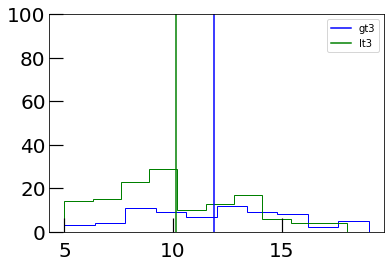

11.814285714285715 3.5788779452418837
9.792592592592593 3.4104334389380213


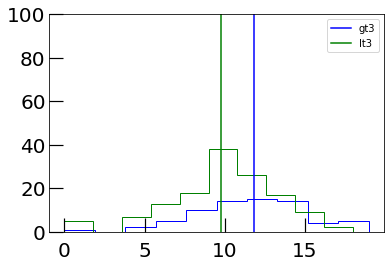

11.657142857142857 4.322319860860813
9.155555555555555 4.639391190370127


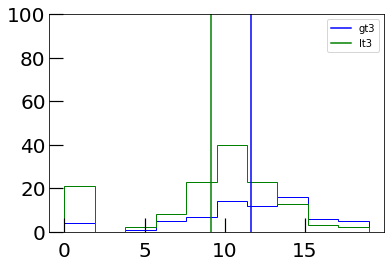

In [37]:
df_m_gt3 = df[df['Medu'] > 3 ]
df_m_lt3 = df[df['Medu'] < 3 ]

df_mf_gt3 = df_m_gt3[df_m_gt3['Fedu']>3]
df_mf_lt3 = df_m_lt3[df_m_lt3['Fedu']<3]

g1_gt3 = df_mf_gt3.loc[:,'G1']
g2_gt3 = df_mf_gt3.loc[:,'G2']
g3_gt3 = df_mf_gt3.loc[:,'G3']

g1_lt3 = df_mf_lt3.loc[:,'G1']
g2_lt3 = df_mf_lt3.loc[:,'G2']
g3_lt3 = df_mf_lt3.loc[:,'G3']

G_list = [[g1_gt3, g1_lt3,], [g2_gt3, g2_lt3], [g3_gt3, g3_lt3]]

label = ['gt3', 'lt3']
color = ['b', 'g']

for G in G_list:
  for i in range(len(G)):
    plt.hist(G[i], histtype='step', color=color[i])
    plt.plot([np.mean(G[i]), np.mean(G[i])], [0, 100], color=color[i], label=label[i])
    plt.ylim(0,100)

    print(np.mean(G[i]), np.std(G[i]))
  plt.legend()
  plt.show()

### Failures



0 : 11.467948717948717 3.158058215055235
1 : 9.56 3.1122981862283052
2 : 8.352941176470589 3.0667318582910763
3 : 6.9375 1.4347800354061246
4 : nan nan


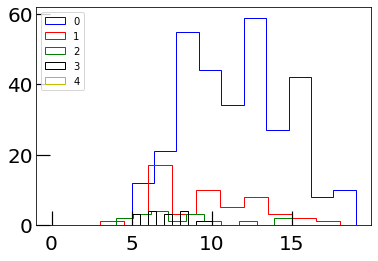

0 : 11.349358974358974 3.5997328389983427
1 : 9.26 3.077726433586976
2 : 7.352941176470588 3.6772940254324196
3 : 6.4375 2.6450129961873534
4 : nan nan


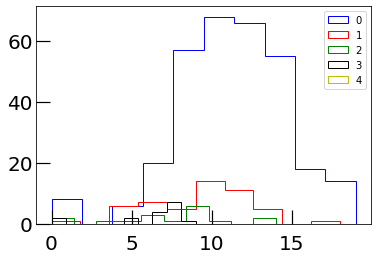

0 : 11.253205128205128 4.162945823846545
1 : 8.12 4.663217773169081
2 : 6.235294117647059 4.69705053592403
3 : 5.6875 4.057689459532358
4 : nan nan


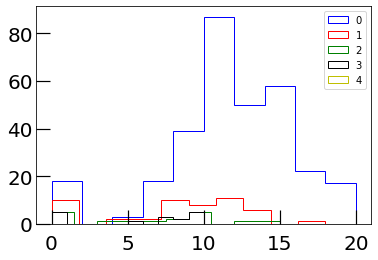

In [38]:
df_ssup_1 = df[df['failures'] == 0]  
df_ssup_2 = df[df['failures'] == 1]
df_ssup_3 = df[df['failures'] == 2]  
df_ssup_4 = df[df['failures'] == 3]
df_ssup_5 = df[df['failures'] == 4]


g1_ssup_1 = df_ssup_1.loc[:,'G1']  
g1_ssup_2 = df_ssup_2.loc[:,'G1']
g1_ssup_3 = df_ssup_3.loc[:,'G1']  
g1_ssup_4 = df_ssup_4.loc[:,'G1']
g1_ssup_5 = df_ssup_5.loc[:,'G1']  


g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']
g2_ssup_3 = df_ssup_3.loc[:,'G2']
g2_ssup_4 = df_ssup_4.loc[:,'G2']
g2_ssup_5 = df_ssup_5.loc[:,'G2']


g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']
g3_ssup_3 = df_ssup_3.loc[:,'G3']
g3_ssup_4 = df_ssup_4.loc[:,'G3']
g3_ssup_5 = df_ssup_5.loc[:,'G3']


g1 = [g1_ssup_1, g1_ssup_2, g1_ssup_3, g1_ssup_4, g1_ssup_5]
g2 = [g2_ssup_1, g2_ssup_2, g2_ssup_3, g2_ssup_4, g2_ssup_5]
g3 = [g3_ssup_1, g3_ssup_2, g3_ssup_3, g3_ssup_4, g3_ssup_5]

g_list = [g1, g2, g3]

label=['0', '1', '2', '3', '4']
color=['b', 'r', 'g', 'k', 'y']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.legend()
  plt.show()

### School support

1: yes
0: no

No : 11.180232558139535 3.3579243231303213
Yes : 9.07843137254902 2.2824405346711396


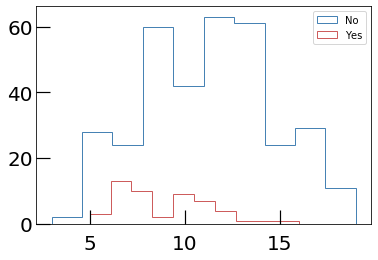

No : 10.883720930232558 3.899667858996735
Yes : 9.568627450980392 2.285975159496419


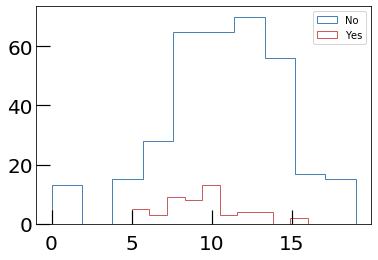

No : 10.561046511627907 4.762595913474711
Yes : 9.431372549019608 2.837113293754655


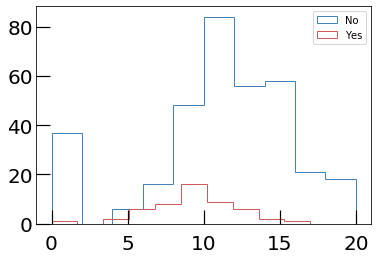

In [39]:
df_ssup_1 = df[df['schoolsup'] == 0]  # no support
df_ssup_2 = df[df['schoolsup'] == 1]  # support

g1_ssup_1 = df_ssup_1.loc[:,'G1']  # no support
g1_ssup_2 = df_ssup_2.loc[:,'G1']  # support


g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']


g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']

g1 = [g1_ssup_1, g1_ssup_2]
g2 = [g2_ssup_1, g2_ssup_2]
g3 = [g3_ssup_1, g3_ssup_2]

g_list = [g1, g2, g3]

label=['No', 'Yes']
color=['steelblue', 'indianred']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.legend()
  plt.show()

### Family support

1: yes
0: no

No : 11.261437908496733 3.4219041479530996
Yes : 10.685950413223141 3.225756514129707


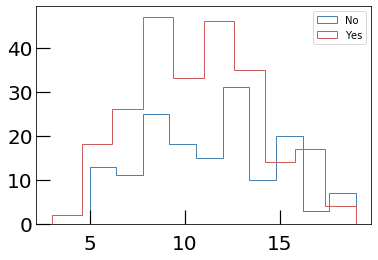

No : 10.993464052287582 3.710956630230656
Yes : 10.537190082644628 3.7747340168219687


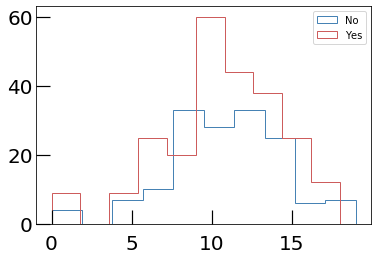

No : 10.640522875816993 4.6210860550208395
Yes : 10.272727272727273 4.540906815906248


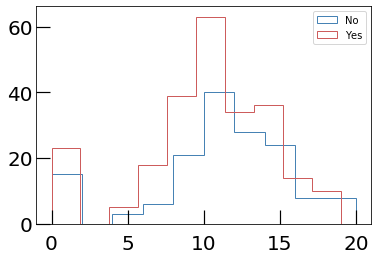

In [40]:
df_ssup_1 = df[df['famsup'] == 0]  # no support
df_ssup_2 = df[df['famsup'] == 1]  # support

g1_ssup_1 = df_ssup_1.loc[:,'G1']  # no support
g1_ssup_2 = df_ssup_2.loc[:,'G1']  # support

g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']

g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']

g1 = [g1_ssup_1, g1_ssup_2]
g2 = [g2_ssup_1, g2_ssup_2]
g3 = [g3_ssup_1, g3_ssup_2]

g_list = [g1, g2, g3]

label=['No', 'Yes']
color=['steelblue', 'indianred']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.legend()
  plt.show()

### Family and School support

No : 11.407142857142857 3.4432053765795194
Yes : 8.868421052631579 2.0669205753535733


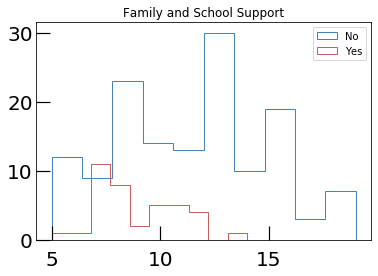

No : 11.057142857142857 3.799946293927677
Yes : 9.31578947368421 2.1655832222569456


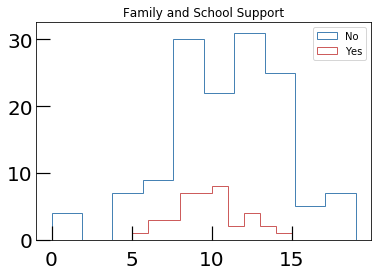

No : 10.65 4.768834838226811
Yes : 9.052631578947368 2.8372277835670645


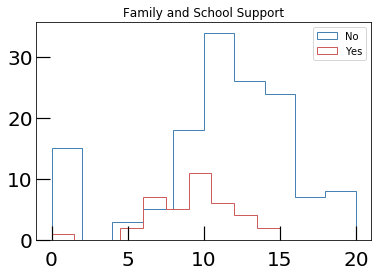

In [41]:
df_onlyschool_1 = df[df['schoolsup'] == 0]  # no support
df_onlyschool_2 = df[df['schoolsup'] == 1]  # support

df_ssup_1 = df_onlyschool_1[df_onlyschool_1['famsup'] == 0] # no support
df_ssup_2 = df_onlyschool_2[df_onlyschool_2['famsup'] == 1] # support


g1_ssup_1 = df_ssup_1.loc[:,'G1']  # no support
g1_ssup_2 = df_ssup_2.loc[:,'G1']  # support


g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']


g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']

g1 = [g1_ssup_1, g1_ssup_2]
g2 = [g2_ssup_1, g2_ssup_2]
g3 = [g3_ssup_1, g3_ssup_2]

g_list = [g1, g2, g3]

label=['No', 'Yes']
color=['steelblue', 'indianred']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.title('Family and School Support')
  plt.legend()
  plt.show()

### Parents job

**Teachers or not**

Yes : 13.666666666666666 3.423773097362356
No : 10.71875 3.258012958461031


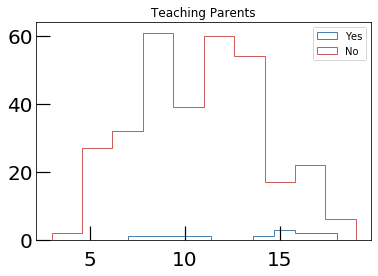

Yes : 13.333333333333334 3.6590830666833583
No : 10.603125 3.667678452969266


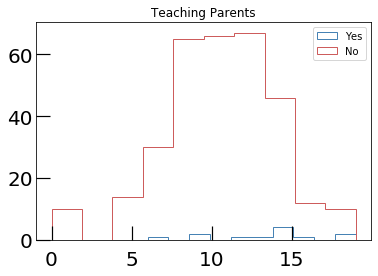

Yes : 13.083333333333334 4.889756867393533
No : 10.259375 4.5399173571084965


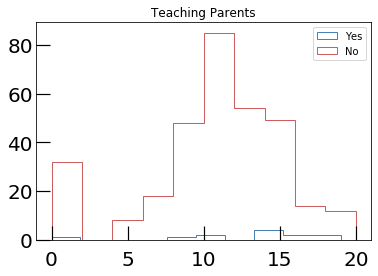

In [42]:
df_fteach = df[df['Fjob'] == 1] #father teaches
df_fnotteach = df[df['Fjob'] != 1]  #father does not teach

df_fmteach = df_fteach[df_fteach['Mjob'] == 1] #father and mother teach
df_fmnotteach = df_fnotteach[df_fnotteach['Mjob'] != 1]  #parents do not teach


g1_teach = df_fmteach.loc[:,'G1']  
g1_notteach = df_fmnotteach.loc[:,'G1']  


g2_teach = df_fmteach.loc[:,'G2']
g2_notteach = df_fmnotteach.loc[:,'G2']


g3_teach = df_fmteach.loc[:,'G3']
g3_notteach = df_fmnotteach.loc[:,'G3']

g1 = [g1_teach, g1_notteach]
g2 = [g2_teach, g2_notteach]
g3 = [g3_teach, g3_notteach]

g_list = [g1, g2, g3]

label=['Yes', 'No']
color=['steelblue', 'indianred']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.title('Teaching Parents')
  plt.legend()
  plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Teaching Parents
G1 grades: 13.666666666666666 +/- 3.423773097362356

Non Teaching Parents
G1 grades: 10.71875 +/- 3.258012958461031

Teaching Parents
G2 grades: 13.666666666666666 +/- 3.423773097362356

Non Teaching Parents
G2 grades: 10.71875 +/- 3.258012958461031

Teaching Parents
G3 grades: 13.666666666666666 +/- 3.423773097362356

Non Teaching Parents
G3 grades: 10.71875 +/- 3.258012958461031



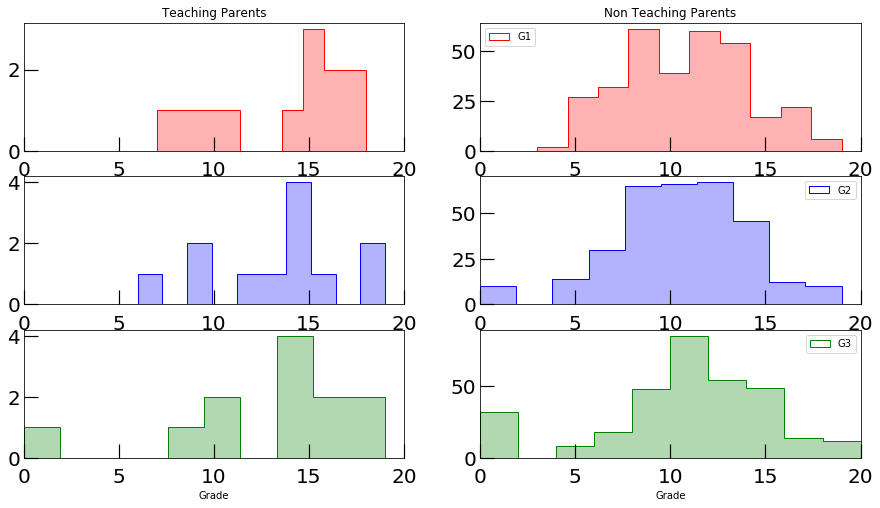

In [43]:
fig, axs = plt.subplots(3,2, figsize=(15,8))

titles = ['Teaching Parents', 'Non Teaching Parents']
exams = ['G1', 'G2', 'G3']
colors = ['r', 'b', 'g']

for j in range(3):
  g = g_list[j]

  for i in range(2):
    axs[j,i].hist(g[i], histtype='step', label=exams[j], color=colors[j])

    axs[j,i].hist(g[i], histtype='stepfilled', color=colors[j], alpha=0.3)
    axs[j,i].set_xlim(0,20)
    axs[j,1].legend()
    
    if j == 0:
      axs[j,i].set_title(titles[i])
    if j == 2:
      axs[j,i].set_xlabel('Grade')
    print(titles[i])
    print(exams[j], 'grades:', np.mean(g1[i]), '+/-', np.std(g1[i]))
    print()
  
plt.show()



### Higher education plan

No : 8.35 2.8683619018526936
Yes : 11.045333333333334 3.2815562703625165


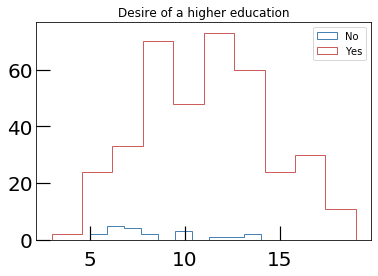

No : 7.8 3.2649655434629015
Yes : 10.869333333333334 3.7175609686399995


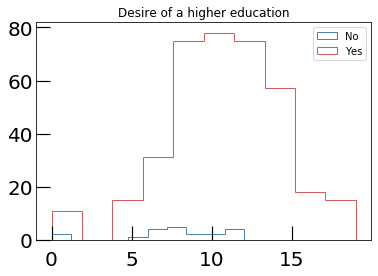

No : 6.8 4.707440918375928
Yes : 10.608 4.4874271767535845


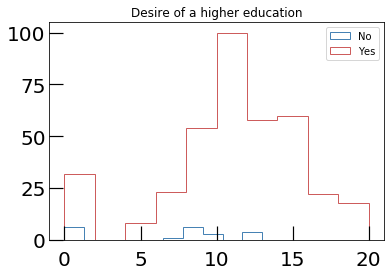

In [44]:
df_ssup_1 = df[df['higher'] == 0]  # does not want higher education
df_ssup_2 = df[df['higher'] == 1]  # wants higher education


g1_ssup_1 = df_ssup_1.loc[:,'G1']
g1_ssup_2 = df_ssup_2.loc[:,'G1'] 


g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']


g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']

g1 = [g1_ssup_1, g1_ssup_2]
g2 = [g2_ssup_1, g2_ssup_2]
g3 = [g3_ssup_1, g3_ssup_2]

g_list = [g1, g2, g3]

label=['No', 'Yes']
color=['steelblue', 'indianred']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.title('Desire of a higher education')
  plt.legend()
  plt.show()

### Workday Alcohol Consumption

Very low : 11.155797101449275 3.448535041122052
Low : 10.306666666666667 3.09827191977865
Middle : 10.576923076923077 2.619058505574341
High : 9.777777777777779 2.249828525701843
Very high : 10.444444444444445 2.454524670486058


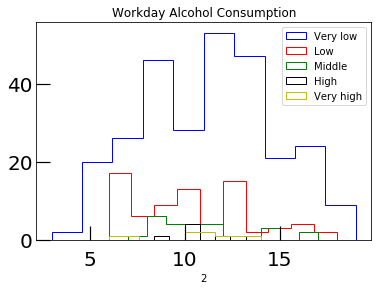

Very low : 10.94927536231884 3.8838619353513613
Low : 10.013333333333334 3.7112202246101695
Middle : 10.538461538461538 2.8451141552164505
High : 9.777777777777779 2.4845199749997664
Very high : 10.777777777777779 2.3934065809486684


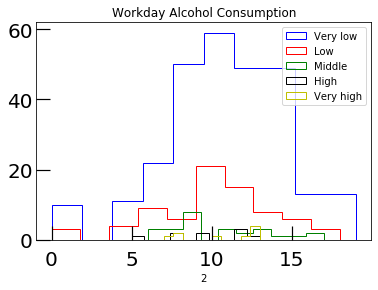

Very low : 10.731884057971014 4.668022352368248
Low : 9.253333333333334 4.780776320036551
Middle : 10.5 3.3769581214232067
High : 9.88888888888889 2.469567863432541
Very high : 10.666666666666666 2.5385910352879697


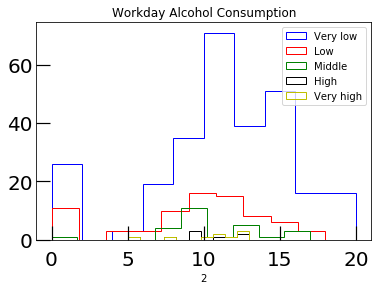

In [45]:
df_ssup_1 = df[df['Dalc'] == 1]  
df_ssup_2 = df[df['Dalc'] == 2]
df_ssup_3 = df[df['Dalc'] == 3]  
df_ssup_4 = df[df['Dalc'] == 4]
df_ssup_5 = df[df['Dalc'] == 5]


g1_ssup_1 = df_ssup_1.loc[:,'G1']  
g1_ssup_2 = df_ssup_2.loc[:,'G1']
g1_ssup_3 = df_ssup_3.loc[:,'G1']  
g1_ssup_4 = df_ssup_4.loc[:,'G1']
g1_ssup_5 = df_ssup_5.loc[:,'G1']  


g2_ssup_1 = df_ssup_1.loc[:,'G2']
g2_ssup_2 = df_ssup_2.loc[:,'G2']
g2_ssup_3 = df_ssup_3.loc[:,'G2']
g2_ssup_4 = df_ssup_4.loc[:,'G2']
g2_ssup_5 = df_ssup_5.loc[:,'G2']


g3_ssup_1 = df_ssup_1.loc[:,'G3']
g3_ssup_2 = df_ssup_2.loc[:,'G3']
g3_ssup_3 = df_ssup_3.loc[:,'G3']
g3_ssup_4 = df_ssup_4.loc[:,'G3']
g3_ssup_5 = df_ssup_5.loc[:,'G3']


g1 = [g1_ssup_1, g1_ssup_2, g1_ssup_3, g1_ssup_4, g1_ssup_5]
g2 = [g2_ssup_1, g2_ssup_2, g2_ssup_3, g2_ssup_4, g2_ssup_5]
g3 = [g3_ssup_1, g3_ssup_2, g3_ssup_3, g3_ssup_4, g3_ssup_5]

g_list = [g1, g2, g3]

label=['Very low', 'Low', 'Middle', 'High', 'Very high']
color=['b', 'r', 'g', 'k', 'y']

for g in g_list:
  for i in range(len(g)):
    plt.hist(g[i], histtype='step',  label=label[i], color=color[i])
    #plt.plot([np.mean(g[i]), np.mean(g[i])],[0,60], c=color[i])
    #plt.axvspan(np.mean(g[i]) - np.std(g[i]), np.mean(g[i]) + np.std(g[i]), color=color[i], alpha=0.2)
    #plt.ylim(0,50)
    print(label[i], ':', np.mean(g[i]), np.std(g[i]))
  plt.title('Workday Alcohol Consumption')
  plt.xlabel(j)
  plt.legend()
  plt.show()

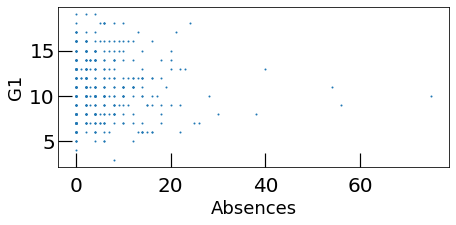

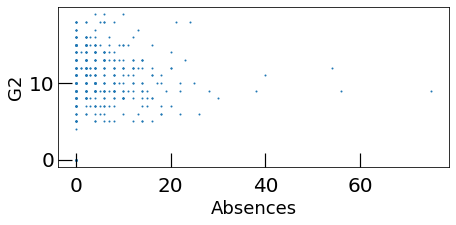

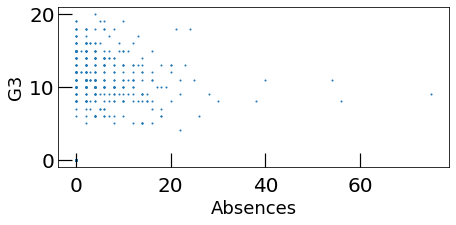

In [46]:
variable = 'absences'

plt_num = 1
for i in range(len(y.iloc[0])):
    plt.figure(figsize=(7,10))
    plt.subplot(len(y.iloc[0]), 1, plt_num)
    plt.scatter(x[variable], y.iloc[:,i], s=1)

    j = 'G%i'%(i + 1)
    plt.ylabel(j, size=18)
    plt.xlabel('Absences', size=18)

    plt_num += 1

plt.show()

### Courses performances comparison

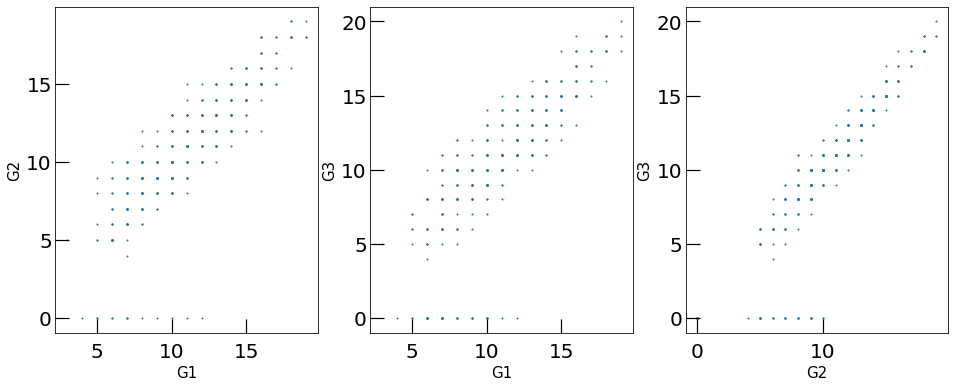

In [47]:
fig, ax = plt.subplots(1,3, figsize=(16,6))

ax[0].scatter(y.iloc[:,0], y.iloc[:,1], s=1)
ax[0].set_xlabel('G1', size=15)
ax[0].set_ylabel('G2', size=15)
ax[1].scatter(y.iloc[:,0], y.iloc[:,2], s=1)
ax[1].set_xlabel('G1', size=15)
ax[1].set_ylabel('G3', size=15)
ax[2].scatter(y.iloc[:,1], y.iloc[:,2], s=1)
ax[2].set_xlabel('G2', size=15)
ax[2].set_ylabel('G3', size=15)
plt.show()

### KLLR

In [48]:
!pip install --upgrade git+https://github.com/afarahi/kllr.git
import kllr as kl

  Cloning https://github.com/afarahi/kllr.git to c:\users\lawso\appdata\local\temp\pip-req-build-qensh4yh


  Running command git clone -q https://github.com/afarahi/kllr.git 'C:\Users\lawso\AppData\Local\Temp\pip-req-build-qensh4yh'
You should consider upgrading via the 'c:\users\lawso\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 191.17it/s]
No handles with labels found to put in legend.


[Text(0, 0, 'None'),
 Text(0, 0, 'Primary'),
 Text(0, 0, '$5^{th}$ - $9^{th}$'),
 Text(0, 0, 'Secondary'),
 Text(0, 0, 'Higher')]

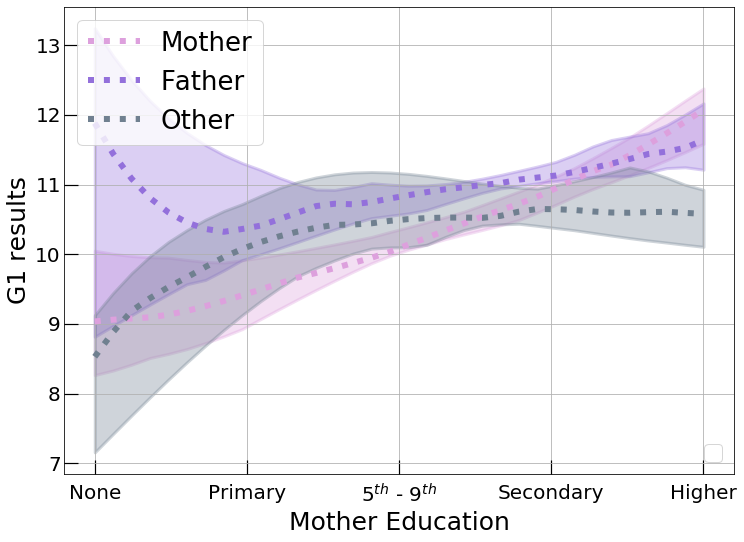

In [49]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'Medu', 'G1', 'guardian', split_bins=[0.5, 1.5, 2.5, 5.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 4], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=1,
                                  show_data=False, xlog=False, ylog=False, color=['plum', 'mediumpurple', 'slategrey'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)
ax[0].lines[1].set_label(None)
ax[0].lines[2].set_label(None)

for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1], ax[0].lines[2]], ["Mother", "Father", "Other"], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G1 results', size=25)
ax[0].set_xlabel('Mother Education', size=25)
ax[0].tick_params(labelbottom=True)
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].set_xticklabels(['None', 'Primary', '$5^{th}$ - '+'$9^{th}$', 'Secondary', 'Higher'])

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 197.04it/s]
No handles with labels found to put in legend.


[Text(0, 0, 'None'),
 Text(0, 0, 'Primary'),
 Text(0, 0, '$5^{th}$ - $9^{th}$'),
 Text(0, 0, 'Secondary'),
 Text(0, 0, 'Higher')]

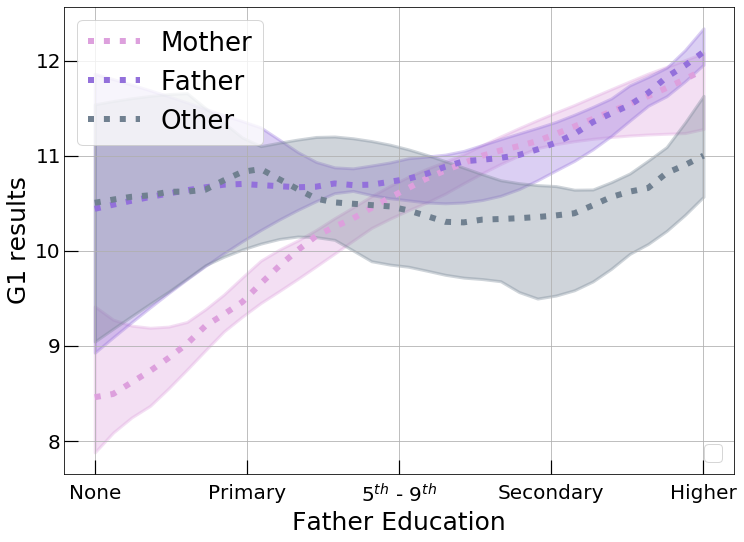

In [50]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'Fedu', 'G1', 'guardian', split_bins=[0.5, 1.5, 2.5, 5.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 4], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=1,
                                  show_data=False, xlog=False, ylog=False, color=['plum', 'mediumpurple', 'slategrey'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)
ax[0].lines[1].set_label(None)
ax[0].lines[2].set_label(None)

for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1], ax[0].lines[2]], ["Mother", "Father", "Other"], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G1 results', size=25)
ax[0].set_xlabel('Father Education', size=25)
ax[0].tick_params(labelbottom=True)
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].set_xticklabels(['None', 'Primary', '$5^{th}$ - '+'$9^{th}$', 'Secondary', 'Higher'])

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 179.75it/s]
No handles with labels found to put in legend.


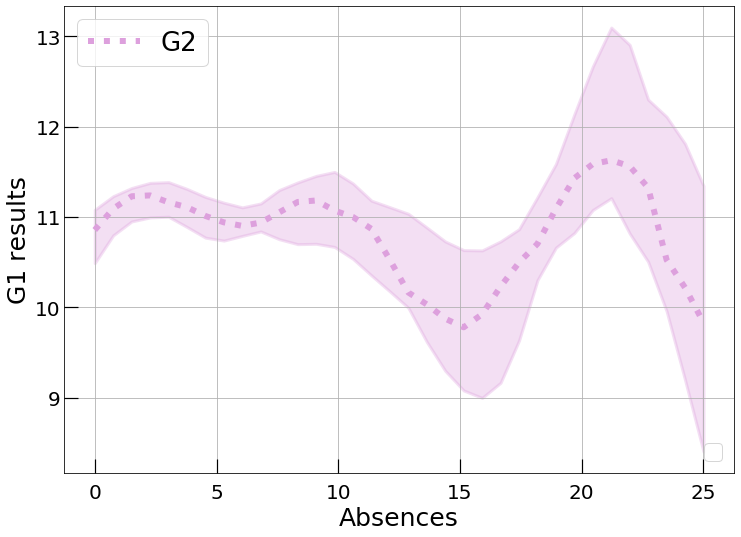

In [51]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'absences', 'G1', 'G2', split_bins=[0.5, 20.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 25], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=2,
                                  show_data=False, xlog=False, ylog=False, color=['plum'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)


for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0]], ['G2'], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G1 results', size=25)
ax[0].set_xlabel('Absences', size=25)
ax[0].tick_params(labelbottom=True)
#ax[0].set_xticks([0, 1, 2, 3, 4])
#ax[0].set_xticklabels(['None', 'Primary', '$5^{th}$ - '+'$9^{th}$', 'Secondary', 'Higher'])

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 203.61it/s]
No handles with labels found to put in legend.


Text(0.5, 1.0, "Mother's Job")

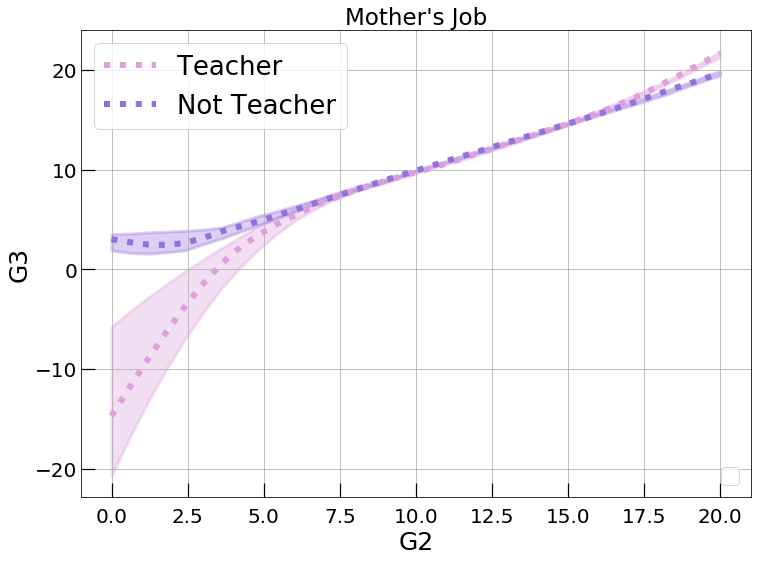

In [52]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'G1', 'G2',  'Mjob', split_bins=[0,1.5,5.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 20], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=2,
                                  show_data=False, xlog=False, ylog=False, color=['plum', 'mediumpurple'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)
ax[0].lines[1].set_label(None)


for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1]], ['Teacher', 'Not Teacher'], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G3', size=25)
ax[0].set_xlabel('G2', size=25)
ax[0].tick_params(labelbottom=True)
ax[0].set_title("Mother's Job", size=23)

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 175.56it/s]
No handles with labels found to put in legend.


Text(0.5, 1.0, "Father's Job")

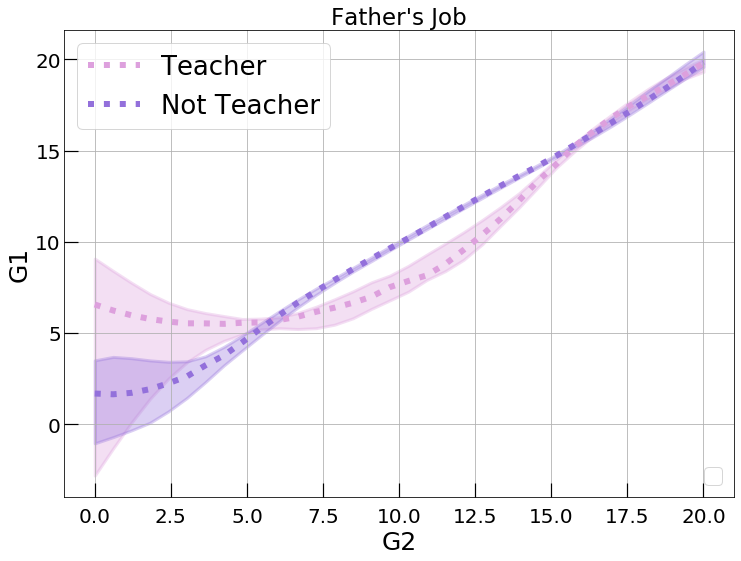

In [53]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'G1', 'G2',  'Fjob', split_bins=[0,1.5,5.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 20], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=2,
                                  show_data=False, xlog=False, ylog=False, color=['plum', 'mediumpurple'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)
ax[0].lines[1].set_label(None)


for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1]], ['Teacher', 'Not Teacher'], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G1', size=25)
ax[0].set_xlabel('G2', size=25)
ax[0].tick_params(labelbottom=True)
ax[0].set_title("Father's Job", size=23)

100%|█████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 204.01it/s]
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Family Relations with or without School support')

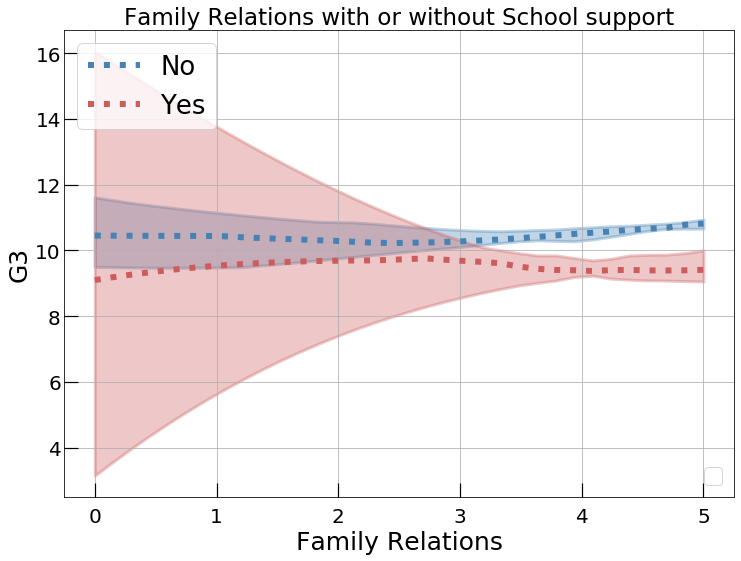

In [54]:
_, ax = kl.Plot_Fit_Summary_Split(df, 'famrel', 'G3',  'schoolsup', split_bins=[-0.1, 0.5, 1.5],
                                  split_mode = 'Data', y_err=None, bins=34, xrange=[0, 5], 
                                  linestyle=':',  black_line=False,
                                  nBootstrap=10, verbose = True, percentile=[16., 84.], kernel_type='gaussian', kernel_width=2,
                                  show_data=False, xlog=False, ylog=False, color=['steelblue', 'indianred'], cmap = None, ax=None)

ax.flat[1].set_visible(False)
ax.flat[2].set_visible(False)

ax[0].lines[0].set_label(None)
ax[0].lines[1].set_label(None)


for line in ax[0].get_lines()[:]: line.set_linewidth(6)

legend1 = ax[0].legend([ax[0].lines[0], ax[0].lines[1]], ['No', 'Yes'], prop={'size':26}, loc=2)
ax[0].add_artist(legend1)
ax[0].legend(loc=4, prop={'size':23})

ax[0].set_ylabel('G3', size=25)
ax[0].set_xlabel('Family Relations', size=25)
ax[0].tick_params(labelbottom=True)
ax[0].set_title("Family Relations with or without School support", size=23)

# Huber Regressor

In [55]:
df_math = pd.read_excel('data/student-mat.xlsx')
df_port = pd.read_excel('data/student-por.xlsx')

df_math = df_math.replace(('GP', 'MS', 'F', 'M', 'U', 'R', 
                           'LE3', 'GT3', 
                           'T', 'A',
                           'teacher', 'health', 'services', 'at_home', 'other', 
                           'home', 'reputation', 'course',
                           'mother', 'father',
                           'yes', 'no'), 
                          (0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 
                           1, 2, 3, 4, 5, 
                           1, 2, 3, 
                           1, 2, 
                           1, 0))

df_port = df_port.replace(('GP', 'MS', 'F', 'M', 'U', 'R', 
                           'LE3', 'GT3', 
                           'T', 'A',
                           'teacher', 'health', 'services', 'at_home', 'other', 
                           'home', 'reputation', 'course',
                           'mother', 'father',
                           'yes', 'no'), 
                          (0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 
                           1, 2, 3, 4, 5, 
                           1, 2, 3, 
                           1, 2, 
                           1, 0))

df_math

FileNotFoundError: [Errno 2] No such file or directory: 'sample_data/student-mat.xlsx'

In [ ]:
from sklearn.linear_model import HuberRegressor 

In [ ]:
train_math = df_math.sample(frac=0.80)
test_math = df_math.sample(frac=0.20)

train_port = df_port.sample(frac=0.80)
test_port = df_port.sample(frac=0.20)

model = HuberRegressor()

In [ ]:
X_math = train_math.loc[:,'Medu'].values.reshape(-1,1)
X_port = train_port.loc[:,'Medu'].values.reshape(-1,1)

y_math = train_math.loc[:,'G3'].values.ravel()
y_port = train_port.loc[:,'G3'].values.ravel()

x_test_math = test_math.loc[:,'Medu'].values.reshape(-1,1)
x_test_port = test_port.loc[:,'Medu'].values.reshape(-1,1)

X = [X_math, X_port]
y = [y_math, y_port]

test = [x_test_math, x_test_port]

subjects = ['Math', 'Portuguese']

In [ ]:
for i in range(len(X)):

  s = subjects[i]

  model.fit(X[i],y[i])

  y_pred = model.predict(test[i])

  #axs[i].scatter(X[i],y[i], s=0.9)
  plt.plot(test[i], y_pred)
  plt.xlim(min(test[i])-0.5, max(test[i])+0.5)
  plt.ylim(8,15)
  plt.xlabel('Mother Education', size=18)
  plt.ylabel('Final %s'%s + ' Exam', size=18)
  plt.show()

  print(s, 'Exam: ', 'Coefficient', model.coef_, '; Intercept',model.intercept_)



In [ ]:
X_math = train_math.loc[:,'Fedu'].values.reshape(-1,1)
X_port = train_port.loc[:,'Fedu'].values.reshape(-1,1)

y_math = train_math.loc[:,'G3'].values.ravel()
y_port = train_port.loc[:,'G3'].values.ravel()

x_test_math = test_math.loc[:,'Fedu'].values.reshape(-1,1)
x_test_port = test_port.loc[:,'Fedu'].values.reshape(-1,1)

X = [X_math, X_port]
y = [y_math, y_port]

test = [x_test_math, x_test_port]

In [ ]:
for i in range(len(X)):

  s = subjects[i]

  model.fit(X[i],y[i])

  #test_lin = np.linspace(0,4,100).reshape(-1,1)
  y_pred = model.predict(test[i])

  #axs[i].scatter(X[i],y[i], s=0.9)
  plt.plot(test[i], y_pred)
  plt.xlim(min(test[i])-0.5, max(test[i])+0.5)
  plt.ylim(8,14)
  plt.xlabel('Father Education', size=18)
  plt.ylabel('Final %s'%s + ' Exam', size=18)
  plt.show()

  print(s, 'Exam: ', 'Coefficient', model.coef_, '; Intercept',model.intercept_)